# Skin Lesion Classification Using Deep Learning

## Introduction

Skin cancer is one of the most common malignant tumors, and many people die from it every year. Medical research has shown that early diagnosis and treatment of skin cancer can greatly improve patient survival. However, early diagnosis of skin lesions is difficult. Currently, the diagnosis of skin lesions mainly relies on the observation of dermatologists. But the small differences between different skin lesions in the early stage require dermatologists to have rich diagnostic experience, and the number of experienced dermatologists is limited.
The development of an automatic skin lesion classification system using deep learning techniques can help dermatologists to efficiently accomplish the early diagnosis of skin lesions and improve the cure rate of patients. However, unlike basic datasets such as MNIST or CIFAR-10, skin lesions are often complex and diverse depending on the skin condition. Therefore, the task of skin lesion classification is more challenging. Our project develops models adapted for skin lesion image classification by using more appropriate deep learning techniques. This will help in better early diagnosis of skin lesions.



## Motivation

The motivation for this project is to use deep learning to develop models applicable to the classification task of skin lesions images, accomplishing accurate diagnosis of skin lesions in early stage, thus improving the cure rate of patients.
Many challenges remain in the practical application of automatic skin lesion classification. The diversity and complexity of skin lesions increase the difficulty of classification, especially when the dataset is imbalanced. Models need to have strong generalization ability and robustness to show high accuracy under different skin tones, skin states, and lighting conditions. An efficient and accurate skin lesion classification system can alleviate the shortage of medical resources and allow patients to receive more timely treatment. Therefore, we plan to use three models, AlexNet, GoogleNet and Restnet, for project development. Through comparative experiments and technical optimization, we will develop deep learning models with high robustness and strong generalization ability, which will provide strong support for the early diagnosis of skin cancer.


## Problem Statement

The aim of this project is to develop and evaluate a deep learning based model for skin lesion classification. The model can accurately identify and classify different types of skin lesions including melanoma, nevi and benign lesions. We will use the ISIC dataset for training and testing. This research plan to study and analyze the performance of three baseline models ( AlexNet, GoogleNet and ResNet ) for skin lesion classification. Then we will select the best performing model to optimize it with optimization techniques. The focus of the project is to cope with the complexity and diversity of skin lesions and to improve the classification accuracy, generalization ability and robustness of the models. This project designed a series of comparative experiments to enhance the effectiveness of the model in a skin lesion classification task, so that develop a diagnostic aid with applications to help patients obtain accurate diagnosis at an early stage.


## Data Sources

**Dataset :**
We selected the ISIC-2018 challenge dataset. The dataset contains dermatoscopic images of various skin lesion types, and also gives a csv file containing the true labels of the skin lesion image data.

**Dataset URL :**
https://challenge.isic-archive.com/data/#2018

**Number of Classes :**
There are 7 classes of skin lesions in the dataset : Melanoma (MEL), Nevus (NV), Basal Cell Carcinoma (BCC), Actinic Keratosis and Intraepithelial Carcinoma (AKIEC), Benign Keratosis-like Lesions (BKL), Dermatofibroma (DF), Vascular Lesions (VASC).

**Dataset size :**
The dataset contains a training set and a test sets.
There are 10,015 images in the training set, and 1,512 images in the test set.

## Exploratory Analysis of Data:

### Data Attributes

#### Data Distribution

The number of images in each category of the dataset :

- MEL 1113

- NV 6705

- BCC 514

- AKIEC 327

- BKL 1099

- DF 115

- VASC 142

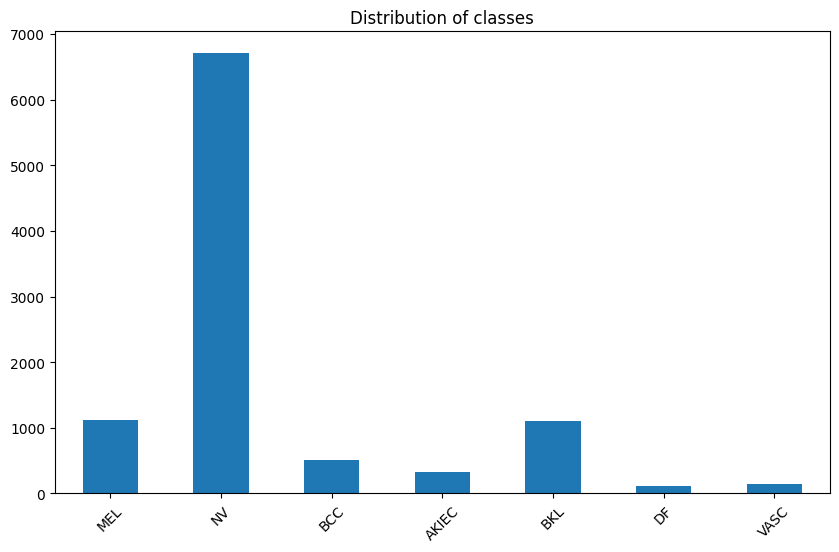

#### Dataset size and resolution

- There are 10015 images in the training set.

- There are 1512 images in the test set.

- All images have the resolution of 600x450.


### Challenging aspects

#### Class imbalance
Based on the data distribution graph above, we can compare that the biggest challenge in this dataset is the serious class imbalance problem. The number of other classes are much less than the number of NV, especially DF and VASC, which just over 100. As we all know, the imbalance problem will cause the model to focus on NV class and ignore the classes with small number. It will reduce the recall and accuracy of those classes and reduces the models’ overall performance. Therefore, we need to use some data processing techniques to ensure that the model performs well when classifying classes with small number.


#### Data format and resolution
The format of image data in the dataset is jpg, and the truth values are stored in a csv file. The resolution of the input images is 600x450. This does not meet the requirements of the model we plan to develop. So we need to reshape these input images and encapsulate them into a data interface that is applicable to the models, and generate npy files from the data interface to speed up model training on colab.

### Data preprocessing

To address the class imbalance and enhance the generalization ability and robustness of the models, we preprocessed the dataset using data augmentation and resampling techniques.

#### Data augmentation
 We used three different augmentations to generate new image data to extend the original dataset:
 - Flip the original image horizontally and vertically, and rotate it 180 degrees;
 - Randomly rotate images of different classes a different number of times, rotations degree range from 30 to 300;
 - Hue and saturation adjustments for the classes with small number.

Flips and random rotations are spatial variations that simulate different dermoscopic shooting angles. Hue and saturation adjustments simulate different skin tones and lighting situations. By using these data augmentation, not only can the impact of the class imbalance problem be reduced, but the generalization ability and robustness of the model can be further improved.

Samples of augmentation results are shown below: (The first row is flipped, the second row is randomly rotated, and the third row is adjusted for hue and saturation)

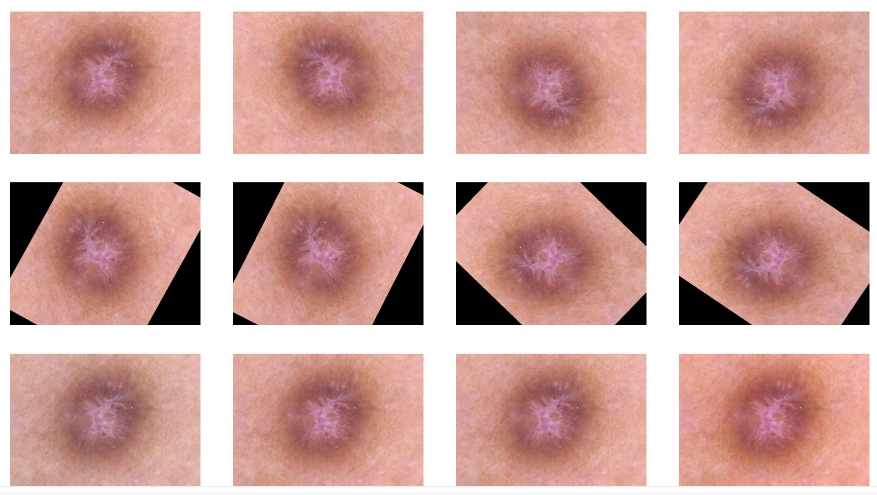

Dataset size changed from 10015 to 44791 after data augmentation

Data distribution after data augmentation:

- MEL  6678

- NV 6705

- BCC 6682

- AKIEC 6540

- BKL 6594

- DF 5060

- VASC 6532

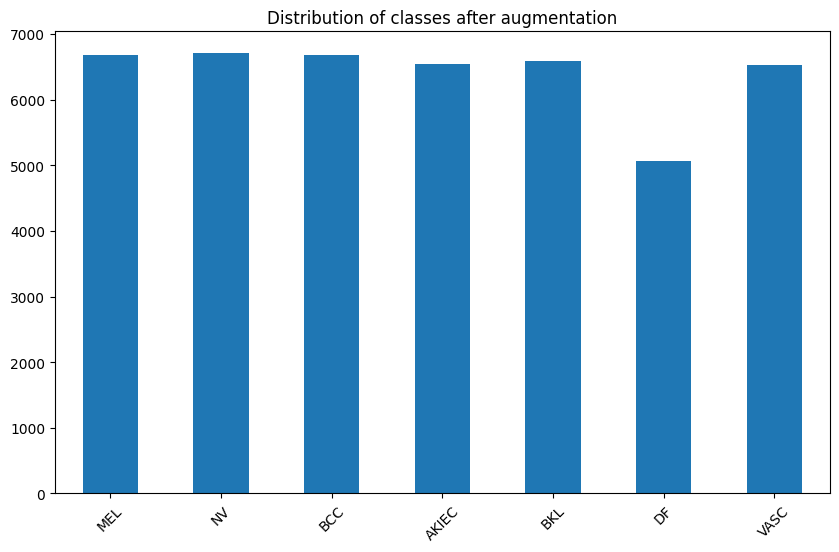

#### Data resampling
We used the RandomOverSampler method to resample all classes in the training set. By using data resampling, the number of image data for each class is exactly the same, further solving the class imbalance problem.

Dataset size changed from 44791 to 46835 after data resampling.

Data distribution after data augmentation:

- MEL  6705

- NV 6705

- BCC 6705

- AKIEC 6705

- BKL 6705

- DF 6705

- VASC 6705

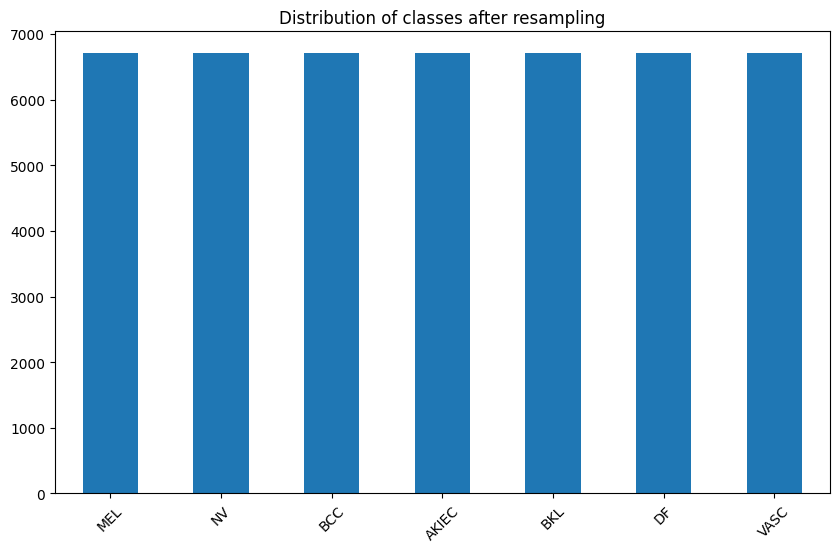

#### Dataset  split

Split the training set into a training set and a validation set in a ratio of 80% to 20%.

The training set contains 37,548 images, the validation set contains 9,387 images.

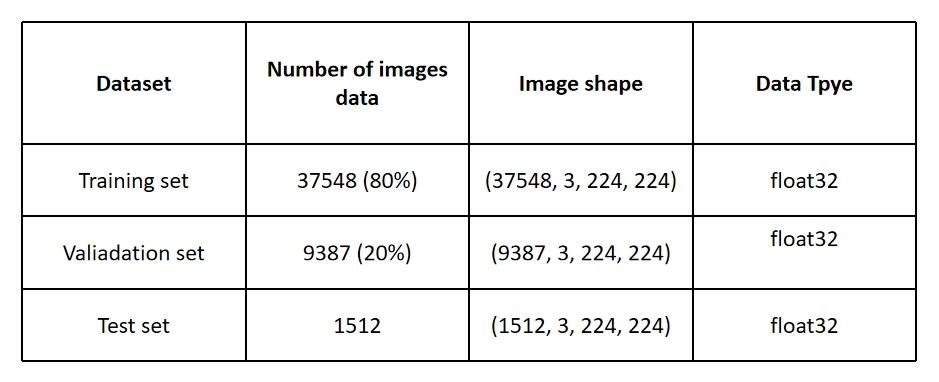

#### Reshape, Normalization and Interface encapsulation
 - **Reshape :** The three baseline models planned to be trained in this project are Alexnet, Googlenet and Resnet. Their accepted input image sizes are all (224, 224). So we first read all the images and reshape as (224, 224)

 - **Image normalization :** Normalizing the input image and scaling the pixel values between 0 and 1 ensures that the model learns the same proportion of features, thus improving model stability and training speed.

- **Dataloader interface :** Read all input images and csv files and encapsulate them into a dataloader interface for model.

- **Generate npy files :** Because the project was developed using colab, the dataloader interface was converted to an npy file to facilitate multiple reads and speed up training.

#### Label One-hot Coding

As a multi-classification task, we need to encode the model's LABEL to one-hot coding for the model to accept the label parameter correctly. The labels have been stored in one-hot form in the csv file of this dataset. Therefore it does not need to be processed again.

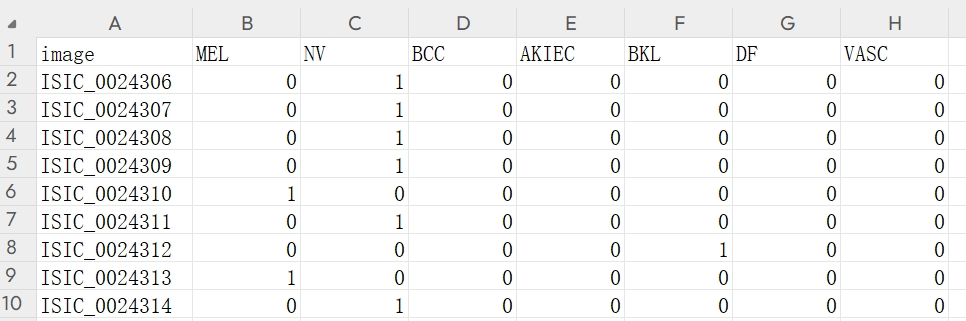

## Data preprocessing and augmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/9444/project'

/content/drive/MyDrive/9444/project


In [ ]:
# Install the required dependencies
!pip install PyDrive2 opencv-python pandas torch torchvision imbalanced-learn tqdm

In [ ]:
# Use data augmentation techniques for the smaller number of classes to further address class imbalances

import os
import shutil
import random
import pandas as pd
from pickle import NEWOBJ
from PIL import Image, ImageOps
from IPython.display import display
from PIL import Image, ImageOps, ImageEnhance

# Setting the save path for the extended dataset for data augmentation and the new CSV file
old_csv = '/content/drive/MyDrive/9444/project/dataset/2018_train_label.csv'
new_csv = '/content/drive/MyDrive/9444/project/dataset/2018_train_extended_label.csv'
old_dir = '/content/drive/MyDrive/9444/project/dataset/train'
new_dir = '/content/drive/MyDrive/9444/project/dataset/train_extend'


df = pd.read_csv('/content/drive/MyDrive/9444/project/dataset/2018_train_label.csv')
# Set the starting index of the new augmentation image, starting with ISIC_0034321.jpg
augment_start_index = 34321


# Define extended data functions with different augmentations for different numbers of classes
def augment_image(image, augment_start_index, type):
    augmented_images = []
    type_dic = {'MEL':5, 'NV':0, 'BCC':5, 'AKIEC':8, 'BKL':2, 'DF':32, 'VASC':34}
    # type_dic = {'MEL':0, 'NV':0, 'BCC':2, 'AKIEC':15, 'BKL':3, 'DF':14, 'VASC':33}

    if not type == 'MEL':
      # Horizontal flip
      h_flip = ImageOps.mirror(image)
      augmented_images.append((h_flip, f"ISIC_{augment_start_index:07d}.jpg"))
      augment_start_index += 1

      # Vertical flip
      v_flip = ImageOps.flip(image)
      augmented_images.append((v_flip, f"ISIC_{augment_start_index:07d}.jpg"))
      augment_start_index += 1

      # 180 degree rotation
      rotate = image.rotate(180)
      augmented_images.append((rotate, f"ISIC_{augment_start_index:07d}.jpg"))
      augment_start_index += 1

    # Randomized rotation of different classes of inputs with different numbers of rotations
    for _ in range(type_dic[type]):
        angle = random.randint(30, 330)
        rotated_image = image.rotate(angle)
        augmented_images.append((rotated_image, f"ISIC_{augment_start_index:07d}.jpg"))
        augment_start_index += 1

    # Hue and saturation adjustment for DF, AKIEC, BCC and VASC type images only.
    hue_factors = []
    sat_factors = []
    if type == 'VASC' or type == 'AKIEC' or type == 'DF':
      hue_factors = [0.9, 1.0, 1.1]    # Hue adjustment factor
      sat_factors = [0.9, 1.0, 1.1]    # Saturation adjustment factor
    elif type == 'BCC':
      hue_factors = [0.9, 1.1]
      sat_factors = [0.9, 1.1]
    for hue_factor in hue_factors:
      for sat_factor in sat_factors:
        if (hue_factor, sat_factor) == (1.0, 1.0):
          continue
        enhancer_hue = ImageEnhance.Color(image)
        hue_adjusted = enhancer_hue.enhance(hue_factor)
        enhancer_sat = ImageEnhance.Color(hue_adjusted)
        final_image = enhancer_sat.enhance(sat_factor)
        augmented_images.append((final_image, f"ISIC_{augment_start_index:07d}.jpg"))
        augment_start_index += 1

    return augmented_images, augment_start_index

# Create a new DataFrame to hold all data after augmentation
new_imageset = []
label_list = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
# Iterate over the original dataset
for idx, row in df.iterrows():
    image_name = row['image']
    label = row[1:].to_dict()
    original_image_path = os.path.join(old_dir, f"{image_name}.jpg")

    # Copy the original image to the new dataset
    new_image_path = os.path.join(new_dir, f"{image_name}.jpg")
    shutil.copy(original_image_path, new_image_path)
    old_image = Image.open(original_image_path)
    new_imageset.append({'image': image_name, **label})

    # Check if it belongs to the most numerous category (NV) and if so skip the augmentation
    if row['NV'] == 1:
        continue

    # Get the class_name of each training set image
    type = ''
    for class_name in label_list:
      if row[class_name] == 1:
        type = class_name
    # Perform data augmentation and save new image
    augmented_images, augment_start_index = augment_image(old_image, augment_start_index, type)
    for aug_image, aug_name in augmented_images:
        aug_image_path = os.path.join(new_dir, aug_name)
        aug_image.save(aug_image_path)

        # Add the label of augmentation image to the new csv
        augmented_row = {'image': aug_name.split('.')[0], **label}
        new_imageset.append(augmented_row)


# Save the CSV file of the expanded dataset
augmented_df = pd.DataFrame(new_imageset)
augmented_df.to_csv(new_csv, index=False)

# Check the CSV files of the original and new datasets
display(df)
display(augmented_df)

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0      ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1      ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2      ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3      ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4      ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
...             ...  ...  ...  ...    ...  ...  ...   ...
10010  ISIC_0034316  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10011  ISIC_0034317  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10012  ISIC_0034318  0.0  0.0  0.0    0.0  1.0  0.0   0.0
10013  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0
10014  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0

[10015 rows x 8 columns]

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0      ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1      ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2      ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3      ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4      ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
...             ...  ...  ...  ...    ...  ...  ...   ...
44786  ISIC_0069094  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44787  ISIC_0069095  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44788  ISIC_0069096  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44789  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0
44790  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0

[44791 rows x 8 columns]

A sample augmentation of a very small number of category DFs is shown here:

The first row is the original image, flipped horizontally, flipped vertically, flipped 180 degrees.
the second row is the rotation at random angles, and the third row is different hue and saturation change.



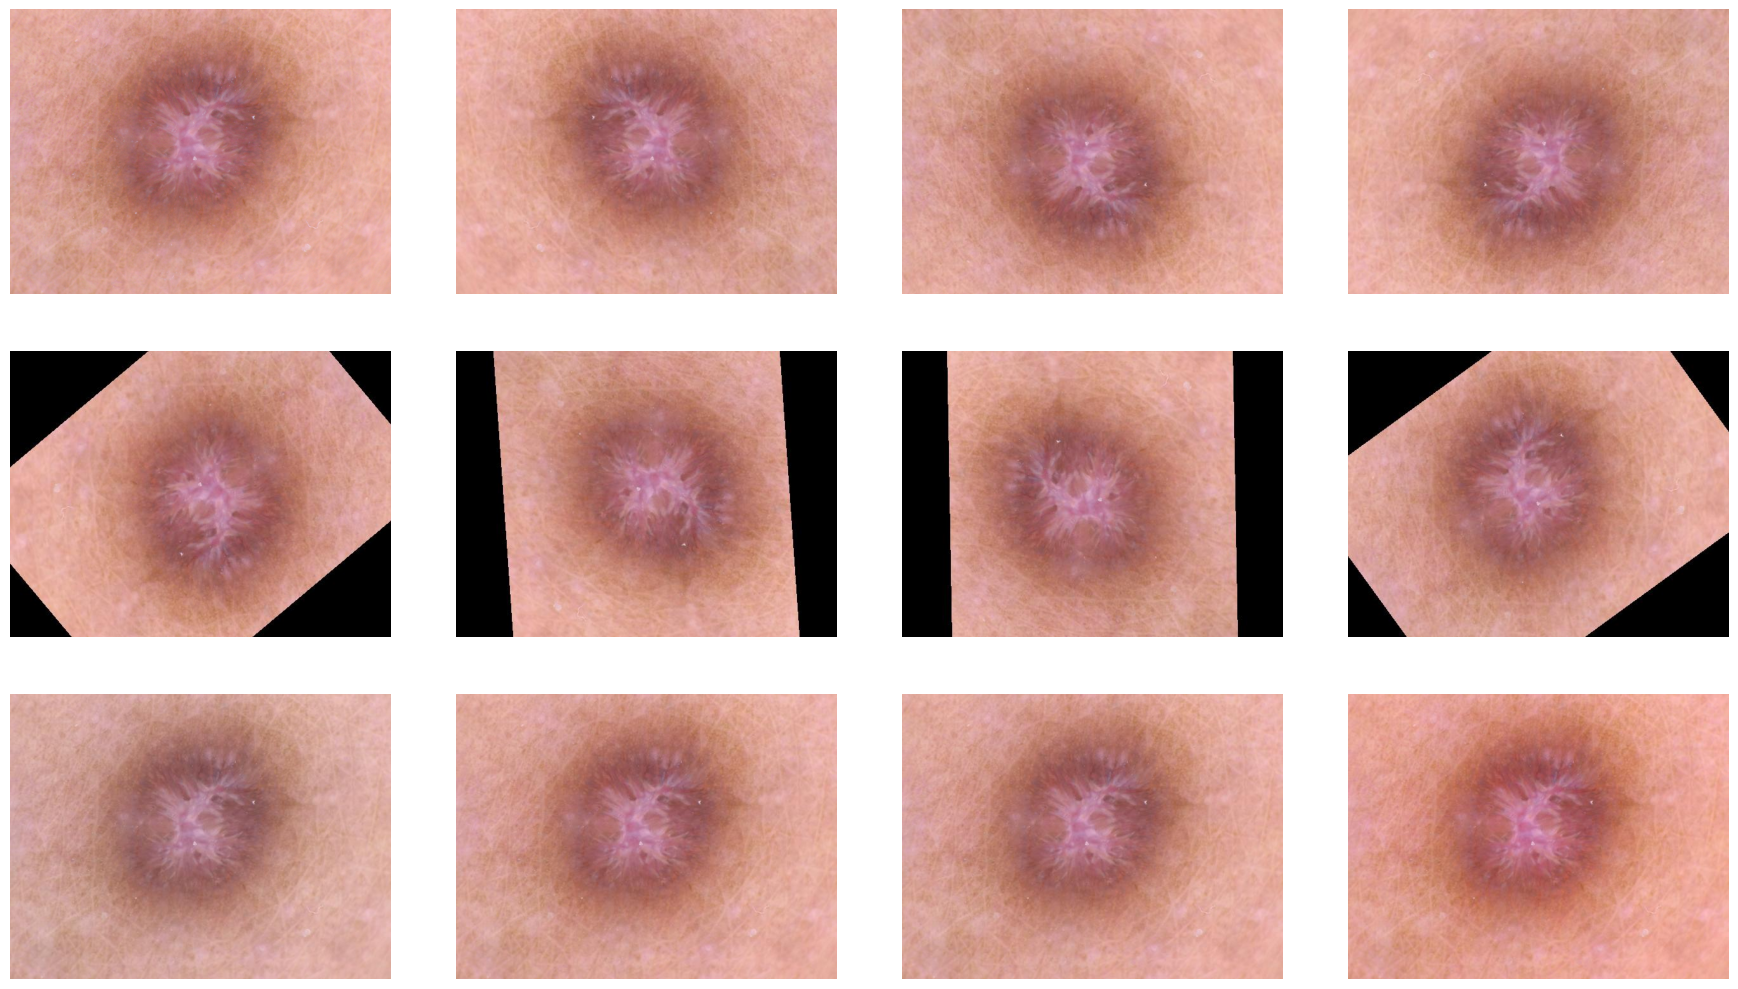

In [ ]:
# Demonstration of the data augmentation used in the original image of the dataset and the augmented balanced class
import matplotlib.pyplot as plt
import os
from PIL import Image

image_files = ['ISIC_0024318.jpg', 'ISIC_0034341.jpg', 'ISIC_0034342.jpg', 'ISIC_0034343.jpg',
               'ISIC_0034344.jpg', 'ISIC_0034345.jpg', 'ISIC_0034346.jpg', 'ISIC_0034347.jpg',
               'ISIC_0034376.jpg', 'ISIC_0034378.jpg', 'ISIC_0034381.jpg', 'ISIC_0034383.jpg']
print('A sample augmentation of a very small number of category DFs is shown here:')
print()
print('The first row is the original image, flipped horizontally, flipped vertically, flipped 180 degrees.')
print('the second row is the rotation at random angles, and the third row is different hue and saturation change.')
print()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))

for ax, img_file in zip(axes.flatten(), image_files):
    img = Image.open('/content/drive/MyDrive/9444/project/dataset/train_extend/'+img_file)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()

Class distribution before augmentation:
MEL      1113
NV       6705
BCC       514
AKIEC     327
BKL      1099
DF        115
VASC      142
dtype: int64


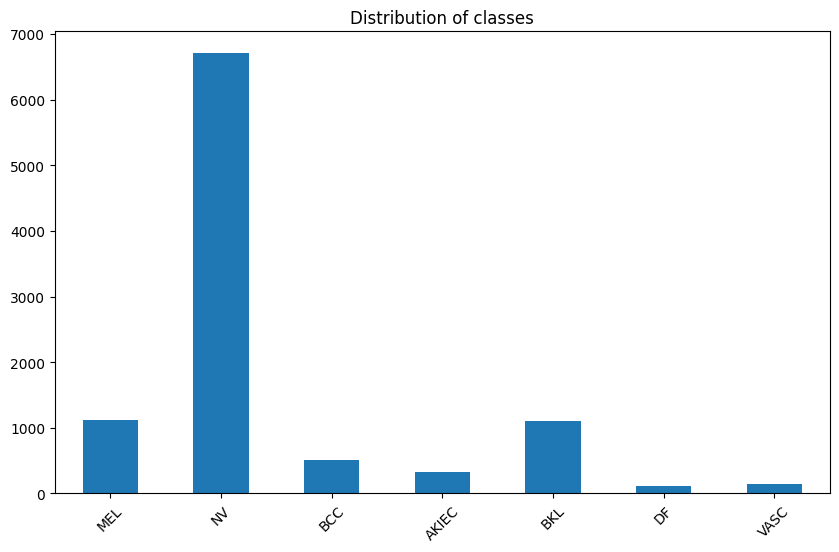


Class distribution after augmentation:
MEL      6678
NV       6705
BCC      6682
AKIEC    6540
BKL      6594
DF       5060
VASC     6532
dtype: int64


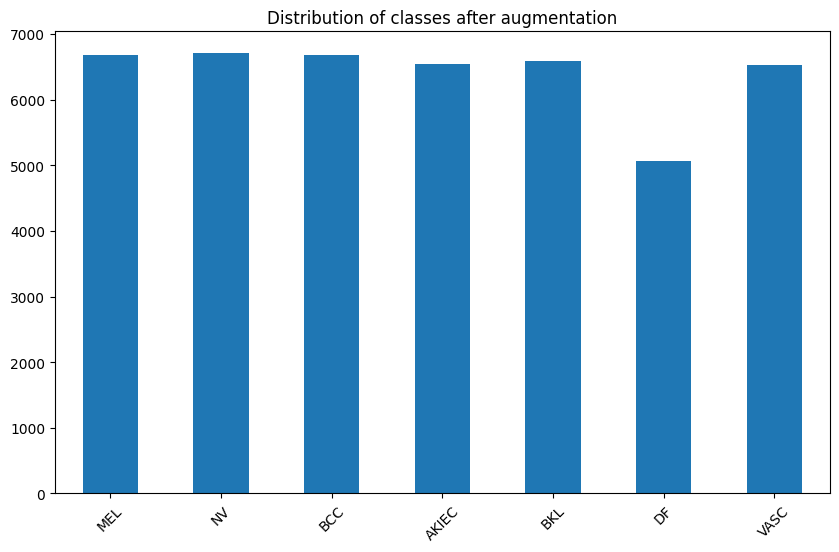

In [ ]:
# Demonstrate the effect of using data augmentation to expand the dataset to reduce the degree of class imbalance
class_count1 = df.iloc[:, 1:].astype(int).sum()
print('Class distribution before augmentation:')
print(class_count1)
plt.figure(figsize=(10, 6))
class_count1.plot(kind='bar')
plt.title("Distribution of classes")
plt.xticks(rotation=45)
plt.show()
print()

class_counts2 = augmented_df.iloc[:, 1:].astype(int).sum()
print('Class distribution after augmentation:')
print(class_counts2)
plt.figure(figsize=(10, 6))
class_counts2.plot(kind='bar')
plt.title("Distribution of classes after augmentation")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Import libraries and check if GPU available
import cv2
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from IPython.display import display
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import random_split

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available.")
else:
    device = torch.device("cpu")
    print("GPU unavailable.")


GPU unavailable.


In [ ]:
train_path = '/content/drive/MyDrive/9444/project/dataset/train'
train_label = '/content/drive/MyDrive/9444/project/dataset/2018_train_label.csv'
train_extend_path = '/content/drive/MyDrive/9444/project/dataset/train_extend'
train_extend_label = '/content/drive/MyDrive/9444/project/dataset/2018_train_extended_label.csv'
test_path = '/content/drive/MyDrive/9444/project/dataset/test'
test_label = '/content/drive/MyDrive/9444/project/dataset/2018_test_label.csv'

trainDF_o = pd.read_csv(train_label)
trainDF_e = pd.read_csv(train_extend_label)
testDF = pd.read_csv(test_label)

# Check the CSV files
display(trainDF_o)
print()
display(trainDF_e)
print()
display(testDF)

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0      ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1      ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2      ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3      ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4      ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
...             ...  ...  ...  ...    ...  ...  ...   ...
10010  ISIC_0034316  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10011  ISIC_0034317  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10012  ISIC_0034318  0.0  0.0  0.0    0.0  1.0  0.0   0.0
10013  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0
10014  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0

[10015 rows x 8 columns]

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0      ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1      ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2      ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3      ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4      ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
...             ...  ...  ...  ...    ...  ...  ...   ...
44786  ISIC_0069094  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44787  ISIC_0069095  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44788  ISIC_0069096  0.0  0.0  0.0    0.0  1.0  0.0   0.0
44789  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0
44790  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0

[44791 rows x 8 columns]

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0     ISIC_0034524  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1     ISIC_0034525  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2     ISIC_0034526  0.0  0.0  0.0    0.0  1.0  0.0   0.0
3     ISIC_0034527  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4     ISIC_0034528  0.0  1.0  0.0    0.0  0.0  0.0   0.0
...            ...  ...  ...  ...    ...  ...  ...   ...
1507  ISIC_0036060  0.0  0.0  0.0    0.0  1.0  0.0   0.0
1508  ISIC_0036061  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1509  ISIC_0036062  0.0  0.0  0.0    1.0  0.0  0.0   0.0
1510  ISIC_0036063  0.0  0.0  0.0    0.0  1.0  0.0   0.0
1511  ISIC_0036064  0.0  0.0  1.0    0.0  0.0  0.0   0.0

[1512 rows x 8 columns]

image  MEL  NV  BCC  AKIEC  BKL  DF  VASC
0      ISIC_0024306    0   1    0      0    0   0     0
1      ISIC_0024307    0   1    0      0    0   0     0
2      ISIC_0024308    0   1    0      0    0   0     0
3      ISIC_0024309    0   1    0      0    0   0     0
4      ISIC_0024310    1   0    0      0    0   0     0
...             ...  ...  ..  ...    ...  ...  ..   ...
46930  ISIC_0047860    0   0    0      0    0   0     1
46931  ISIC_0039763    0   0    0      0    0   0     1
46932  ISIC_0057355    0   0    0      0    0   0     1
46933  ISIC_0046977    0   0    0      0    0   0     1
46934  ISIC_0041502    0   0    0      0    0   0     1

[46935 rows x 8 columns]


Class distribution after resampling:
MEL      6705
NV       6705
BCC      6705
AKIEC    6705
BKL      6705
DF       6705
VASC     6705
dtype: int64



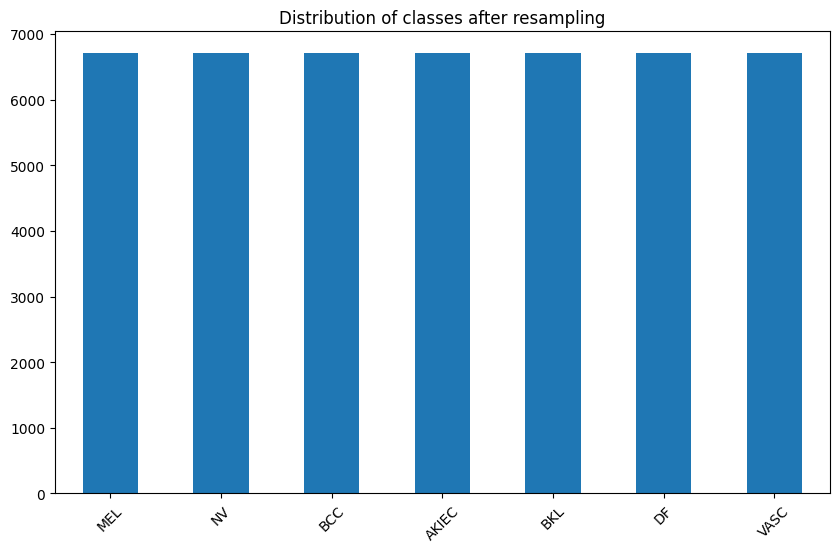

In [ ]:
# Perform resampling on training data to achieve class balance
def resample(train_df):
  # Convert one-hot encoded columns to a single label column based on the max value
  label_columns = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
  train_df['label'] = train_df[label_columns].idxmax(axis=1)
  # Separate image names and labels
  X = train_df[['image']]
  y = train_df['label']

  # Use RandomOverSampler to balance the classes by resampling
  ros = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = ros.fit_resample(X, y)

  # Convert the single label column back to one-hot encoding
  train_df_resampled = pd.concat([X_resampled, pd.get_dummies(y_resampled).astype(int)], axis=1)
  train_df_resampled = train_df_resampled[['image'] + label_columns]
  return train_df_resampled

trainDF_o = resample(trainDF_o)
trainDF_e = resample(trainDF_e)
display(trainDF_e)
print()
class_count3 = trainDF_e.iloc[:, 1:].astype(int).sum()
print('Class distribution after resampling:')
print(class_count3)
print()
plt.figure(figsize=(10, 6))
class_count3.plot(kind='bar')
plt.title("Distribution of classes after resampling")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ISIC dataset class
class ISICDateset(Dataset):
  def __init__(self, image_path, dataframe, transform=None):
    self.labelDF = dataframe
    self.image_path = image_path
    self.transform = transform

  def __len__(self):
    return len(self.labelDF)

  def __getitem__(self, index):
    i_name = self.labelDF.iloc[index]['image']
    i_path = os.path.join(self.image_path, f"{i_name}.jpg")
    image = Image.open(i_path).convert('RGB')
    self.labelDF['one_hot'] = self.labelDF[['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].apply(list, axis=1)
    label = self.labelDF.loc[self.labelDF['image'] == i_name, 'one_hot'].values
    # Enable specified transform
    if self.transform:
      image = self.transform(image)

    return image, torch.tensor(label[0], dtype=torch.long)


In [ ]:
# Constructing a composition of transforms, including resize, and normalization
def get_transforms(input_size=(224, 224)):
    transform_list = [
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
    return transforms.Compose(transform_list)

# Constructing the train, val and test dataloader
def get_dataloader(train_path, test_path, trainDF, valDF, testDF, input_size=(224, 224), batch_size=32):
  train_transforms = get_transforms(input_size)
  val_transforms = get_transforms(input_size)
  test_transforms = get_transforms(input_size)

  train_dataset = ISICDateset(train_path, trainDF, transform=train_transforms)
  val_dataset = ISICDateset(train_path, valDF, transform=val_transforms)
  test_dataset = ISICDateset(test_path, testDF, transform=test_transforms)

  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8)
  test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  return train_dataloader, val_dataloader, test_dataloader

# Split the training set and the validation set using original dataset
trainDF_o, valDF_o = train_test_split(trainDF_o, test_size=0.2, random_state=42)
# get dataloader of original dataset
train_loader_o, val_loader_o, test_loader_o = get_dataloader(train_path, test_path, trainDF_o, valDF_o, testDF, (224, 224), 32)

# Split the training set and the validation set using extended dataset
trainDF, valDF = train_test_split(trainDF_e, test_size=0.2, random_state=42)
# get dataloader of augmentation dataset
train_loader, val_loader, test_loader = get_dataloader(train_extend_path, test_path, trainDF, valDF, testDF, (224, 224), 32)


In [ ]:
# Check DataLoader working correctly
def check_loader(loader, loader_name):
  for batch in loader:
    if not batch:
      print('batch is none')
      continue
    images, labels = batch
    if images is None or labels is None:
      print('image or label is none')
      continue
    images = images.to(device)
    labels = labels.to(device)
    print(f"{loader_name} Images: ", images.size(), " Labels: ", labels.size())
    break
print('Start checking DataLoader information:')
check_loader(train_loader, "Training")
check_loader(val_loader, "Validation")
check_loader(test_loader, "Test")


Start checking DataLoader information:
Training Images:  torch.Size([32, 3, 224, 224])  Labels:  torch.Size([32, 7])
Validation Images:  torch.Size([32, 3, 224, 224])  Labels:  torch.Size([32, 7])
Test Images:  torch.Size([32, 3, 224, 224])  Labels:  torch.Size([32, 7])


In [ ]:
# Get all the data in the loader and save it as an npy file for model training
def save_data_npy(loader, type):
  images_list = []
  labels_list = []
  for batch in tqdm(loader, desc=f"Generating the "+type):
      images, labels = batch
      # Skip if file does not exist
      if images is None or labels is None:
          continue
      try:
          images_list.append(images.cpu().numpy())
          labels_list.append(labels.cpu().numpy())
      except OSError as e:
          print(f"Generating Error: {e}")
          continue
  images = np.concatenate(images_list, axis=0)
  labels = np.concatenate(labels_list, axis=0)
  # Check the loaded data shapes
  print("Training images: ", images.shape, " Labels: ", labels.shape)
  print()
  save_dir = '/content/drive/MyDrive/9444/project/dataset/npy'
  np.save(os.path.join(save_dir, f'{type}_images.npy'), images)
  np.save(os.path.join(save_dir, f'{type}_labels.npy'), labels)

In [ ]:
print('Start generating and storing npy files:')
print()
save_data_npy(train_loader_o, 'train_o')
save_data_npy(val_loader_o, 'val_o')
save_data_npy(train_loader, 'train_e')
save_data_npy(val_loader, 'val_e')
save_data_npy(test_loader, 'test')

Start generating and storing npy files:



Generating the train_o: 100%|██████████| 1174/1174 [30:09<00:00,  1.54s/it]


Training images:  (37548, 3, 224, 224)  Labels:  (37548, 7)



Generating the val_o: 100%|██████████| 294/294 [02:34<00:00,  1.91it/s]


Training images:  (9387, 3, 224, 224)  Labels:  (9387, 7)



Generating the train_e: 100%|██████████| 1174/1174 [30:47<00:00,  1.57s/it]


Training images:  (37548, 3, 224, 224)  Labels:  (37548, 7)



Generating the val_e: 100%|██████████| 294/294 [05:31<00:00,  1.13s/it]


Training images:  (9387, 3, 224, 224)  Labels:  (9387, 7)



Generating the test: 100%|██████████| 48/48 [06:24<00:00,  8.01s/it]


Training images:  (1512, 3, 224, 224)  Labels:  (1512, 7)



# Models and Methods
In the research project for skin lesion classification, AlexNet, GoogLeNet, and ResNet50 were selected due to their outstanding performance in image classification tasks and their distinct architectural features, which allow them to effectively extract image features and improve classification accuracy. Each model has unique advantages that provide excellent support in handling large datasets, diverse features, and training stability, making them well-suited for skin lesion classification tasks.

## Model1: AlexNet

AlexNet is a deep convolutional neural network that revolutionized the field of image classification with its success in the 2012 ImageNet competition. The architecture of AlexNet consists of five convolutional layers and three fully connected layers, utilizing ReLU activation functions to speed up the training process and enhance the model's nonlinear representation capabilities. Additionally, AlexNet introduced dropout to prevent overfitting and used max-pooling layers to reduce the dimensionality of feature maps, thereby increasing computational efficiency. AlexNet also employed data augmentation techniques, such as random cropping and flipping, to improve the model's generalization ability.

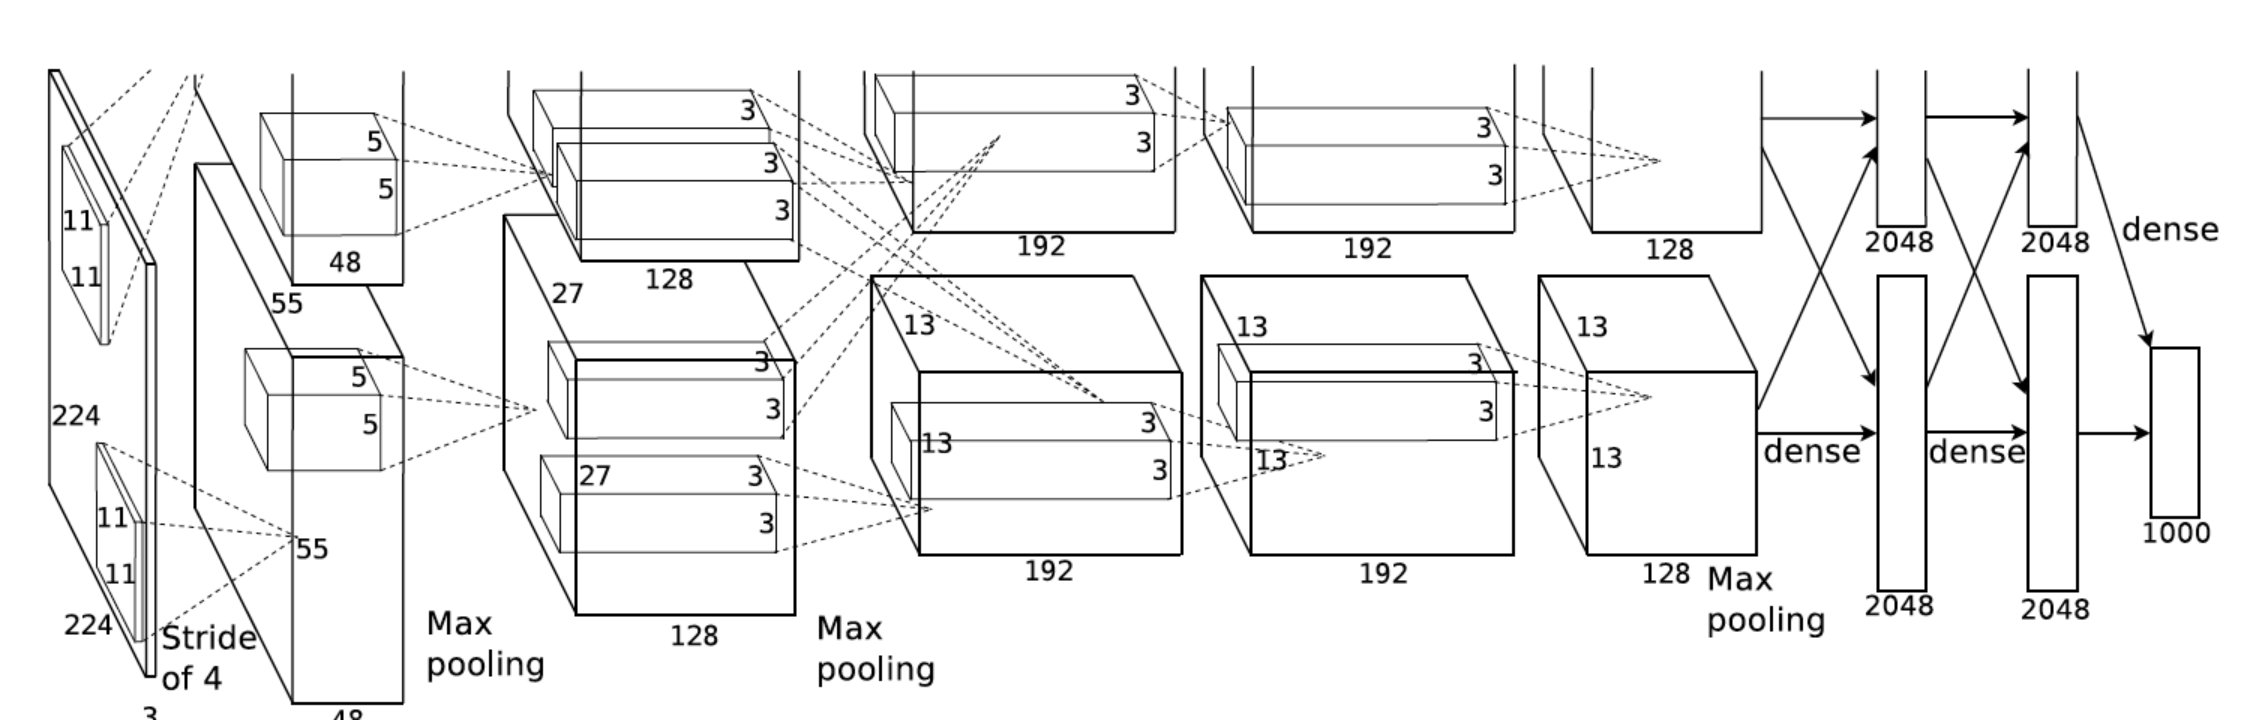

###Advantages:

1.AlexNet uses deep convolutional layers and max-pooling to extract important features, ensuring effective learning from large datasets.

2.Its utilization of GPUs significantly enhances the training speed on large datasets.

3.The use of ReLU activation helps avoid the vanishing gradient problem, accelerating convergence.

4.The dropout mechanism significantly reduces the risk of overfitting, making the model more robust.

###Support:
AlexNet is particularly suitable for tasks requiring high accuracy in object recognition, such as autonomous driving and medical imaging analysis. Its network structure allows it to learn detailed features, making it highly suitable for applications where precise object identification is required. Furthermore, AlexNet's efficiency in learning from large image datasets makes it well-suited for deep learning tasks that require rapid training.

In [ ]:
#alexnet v2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/'

In [ ]:
%cd /content/drive/MyDrive/project



/content/drive/.shortcut-targets-by-id/18d16qRMMA_Oxrzo54cUftSwci_5cpAgU/project


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision import models
from sklearn.metrics import *
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

# Dataset class
class NpyDataset(Dataset):
    def __init__(self, image_file, label_file):
        self.images = np.load(image_file)
        self.labels = np.load(label_file)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label

def load_dataloader_from_npy(image_file, label_file, batch_size, shuffle=True):
    dataset = NpyDataset(image_file=image_file, label_file=label_file)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

def validate(model, loader, device):
    all_tgs = []
    all_pred = []
    with torch.no_grad():
        for images, labels in tqdm(loader):
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)

            outputs = model(images)
            _, pred = torch.max(outputs, 1)

            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    f1_macro = f1_score(all_tgs, all_pred, average="macro")
    accuracy = accuracy_score(all_tgs, all_pred)
    return f1_macro, accuracy

def save_results_to_file(losses, f1_list, accu_list, dataset_type, model_name):
    os.makedirs("./result", exist_ok=True)
    losses_path = f'./result/train_losses_{dataset_type}_{model_name}.csv'
    f1_scores_path = f'./result/f1_scores_{dataset_type}_{model_name}.csv'
    accuracy_path = f'./result/accuracies_{dataset_type}_{model_name}.csv'

    with open(losses_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Loss"])
        for i, loss in enumerate(losses):
            writer.writerow([i + 1, loss])

    with open(f1_scores_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "F1 Score"])
        for i, f1 in enumerate(f1_list):
            writer.writerow([i + 1, f1])

    with open(accuracy_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Accuracy"])
        for i, acc in enumerate(accu_list):
            writer.writerow([i + 1, acc])

def alexnet_train(dataset_type, batch_size, num_classes, lr, epoch_num, optim_value, optim_type, pretrained):
    def save_ckpt(path):
        torch.save({
            "cur_itrs": cur_itrs,
            "model_state": model.module.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "best_score": best_score,
        }, path)

    # Setup data paths
    train_image_file = f'dataset/npy/train_{dataset_type}_images.npy'
    train_label_file = f'dataset/npy/train_{dataset_type}_labels.npy'
    val_image_file = f'dataset/npy/val_{dataset_type}_images.npy'
    val_label_file = f'dataset/npy/val_{dataset_type}_labels.npy'
    ckpt = f'checkpoints/latest_alexnet_{dataset_type}.pth'

    # Initialize tracking lists
    train_losses, f1_list, accuracy_list = [], [], []

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device: {device}")

    # Load data
    train_loader = load_dataloader_from_npy(train_image_file, train_label_file, batch_size, shuffle=True)
    val_loader = load_dataloader_from_npy(val_image_file, val_label_file, batch_size, shuffle=False)
    print(f"Training set: {len(train_loader) * batch_size}, Validation set: {len(val_loader) * batch_size}")

    # Setup training parameters
    data_count = len(train_loader)
    total_itrs = data_count * epoch_num

    # Initialize model
    model = models.alexnet(pretrained=pretrained)
    # Modify classifier
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, num_classes)

    # Setup optimizer
    if optim_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=optim_value)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4700, gamma=0.1)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=optim_value)

    criterion = nn.CrossEntropyLoss()

    # Create checkpoints directory
    os.makedirs('./checkpoints', exist_ok=True)
    best_score = 0.0
    cur_itrs = 0
    cur_epochs = 0

    # Load checkpoint if exists
    if ckpt is not None and os.path.isfile(ckpt):
        checkpoint = torch.load(ckpt, map_location=torch.device('cpu'))
        model.load_state_dict(checkpoint["model_state"])
        model = nn.DataParallel(model)
        print(f"Model restored from {ckpt}")
        del checkpoint
    else:
        print("[!] Not restoring, training from scratch")
        model = nn.DataParallel(model)

    model = model.to(device)

    # Training loop
    t_loss = 0
    patience = 3
    no_improve = 0

    while True:
        model.train()
        cur_epochs += 1

        for images, labels in train_loader:
            cur_itrs += 1

            images = images.to(device)
            labels = labels.to(device)
            labels = torch.argmax(labels, dim=1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if optim_type == "Adam":
                scheduler.step()

            t_loss += loss.item()

            if cur_itrs % data_count == 0:
                t_loss = t_loss / data_count
                train_losses.append(t_loss)
                print(f"Epoch {cur_epochs}, Itrs {cur_itrs}/{total_itrs}, Loss={t_loss}")

                t_loss = 0.0
                save_ckpt(ckpt)

                # Validation
                model.eval()
                f1_s, accuracy = validate(model=model, loader=val_loader, device=device)
                f1_list.append(f1_s)
                accuracy_list.append(accuracy)

                if f1_s > best_score:
                    best_score = f1_s
                    no_improve = 0
                    save_ckpt(f"checkpoints/best_alexnet_{dataset_type}.pth")
                else:
                    no_improve += 1

                model.train()

        if cur_itrs >= total_itrs or no_improve >= patience:
            save_results_to_file(train_losses, f1_list, accuracy_list, dataset_type, "alexnet")
            if cur_itrs < total_itrs:
                print("Early Stop")
            return

def predict_and_evaluate_alexnet(dataset_type, test_image_file, test_label_file, pretrained):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    batch_size = 32
    num_classes = 7
    label_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

    ckpt = f'checkpoints/best_alexnet_{dataset_type}.pth'
    test_loader = load_dataloader_from_npy(test_image_file, test_label_file, batch_size, shuffle=True)

    # Initialize model
    model = models.alexnet(pretrained=pretrained)
    # Modify classifier
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, num_classes)

    if ckpt is not None and os.path.isfile(ckpt):
        checkpoint = torch.load(ckpt, map_location=torch.device('cpu'))
        model.load_state_dict(checkpoint["model_state"])
        model = nn.DataParallel(model)
        print(f"Resume model from {ckpt}")
        del checkpoint
    else:
        print("[!] Retrain")
        model = nn.DataParallel(model)

    model.to(device)
    model.eval()

    all_tgs = []
    all_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)

            outputs = model(images)
            _, pred = torch.max(outputs, 1)

            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    print(classification_report(all_tgs, all_pred, target_names=label_names, zero_division=0))

    cm = confusion_matrix(all_tgs, all_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

def analyze_alexnet_training(dataset_type):
    """
    Analyze and visualize AlexNet training results
    """
    # Define paths for result files
    losses_path = f'./result/train_losses_{dataset_type}_alexnet.csv'
    f1_scores_path = f'./result/f1_scores_{dataset_type}_alexnet.csv'
    accuracy_path = f'./result/accuracies_{dataset_type}_alexnet.csv'

    # Plot F1 Score curve
    iterations, f1_score = load_data(f1_scores_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, f1_score, label="F1 Score")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("AlexNet Validation F1 Score Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy curve
    iterations, accuracy = load_data(accuracy_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, accuracy, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("AlexNet Accuracy Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Loss curve
    iterations, train_losses = load_data(losses_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, train_losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("AlexNet Training Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

def load_data(filename):
    iterations = []
    values = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            iterations.append(int(row[0]))
            values.append(float(row[1]))
    return iterations, values








In [ ]:
alexnet_train(
    dataset_type="o",
    batch_size=32,
    num_classes=7,
    lr=0.005,
    epoch_num=32,
    optim_value=1e-4,
    optim_type="Adam",
    pretrained=False
)


Device: cuda


In [ ]:
analyze_alexnet_training(dataset_type="o"

In [ ]:
test_image_file = './dataset/npy/test_images.npy'
test_label_file = './dataset/npy/test_labels.npy'
predict_and_evaluate_alexnet(
    dataset_type="o",
    test_image_file=test_image_file,
    test_label_file=test_label_file,
    pretrained=False
)

In [ ]:
alexnet_train("o", 32, 7, 0.005, 32, 1e-4, "Adam", False)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-8-c695a51028c6>:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

Model restored from checkpoints/latestefficientnetv2_o.pth
Epoch 1, Itrs 1174/37568, Loss=1.956858


100%|██████████| 294/294 [00:10<00:00, 28.04it/s]


Epoch 2, Itrs 2348/37568, Loss=1.955776


100%|██████████| 294/294 [00:10<00:00, 27.68it/s]


Epoch 3, Itrs 3522/37568, Loss=1.956131


100%|██████████| 294/294 [00:10<00:00, 27.81it/s]


Epoch 4, Itrs 4696/37568, Loss=1.955966


100%|██████████| 294/294 [00:10<00:00, 27.76it/s]


Early Stop


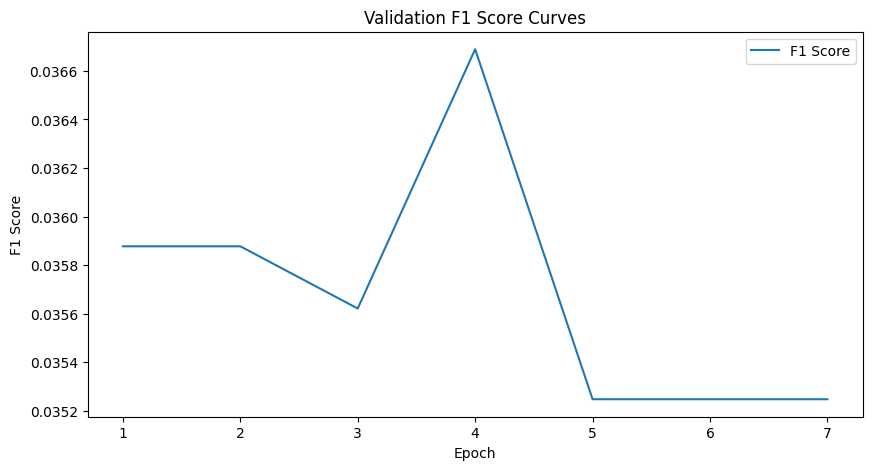

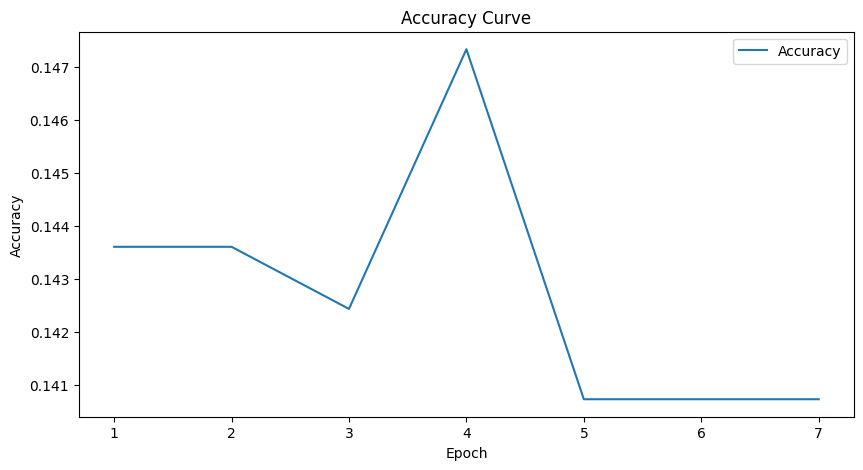

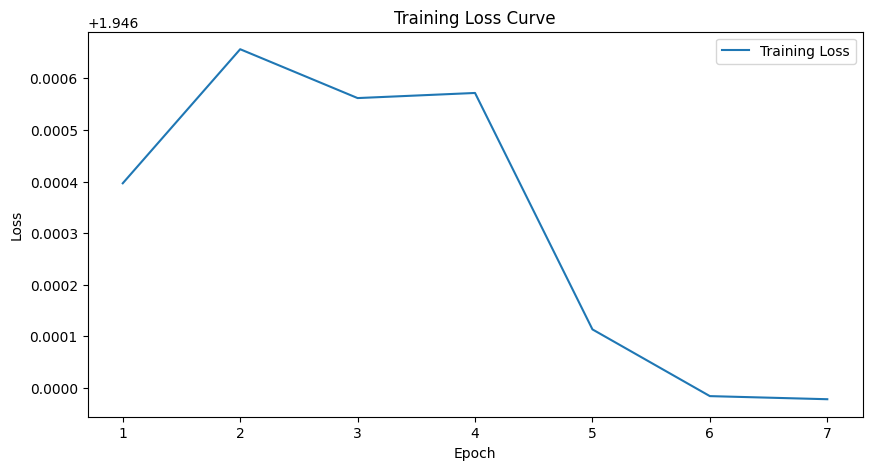

In [ ]:
analyze_training(dataset_type="_o", model_name="efficientnetv2")

##Model2: GoogLeNet

GoogLeNet is a deep convolutional neural network based on the Inception architecture, known for its efficient performance in image classification tasks. The innovation of GoogLeNet lies in its Inception module, which extracts features at multiple scales by using different filters (such as 1x1, 3x3, and 5x5) in parallel, allowing it to better capture the diversity and details of images. Additionally, GoogLeNet introduced auxiliary classifiers to address the vanishing gradient problem in deep networks, thereby improving the stability and accuracy of the training process.

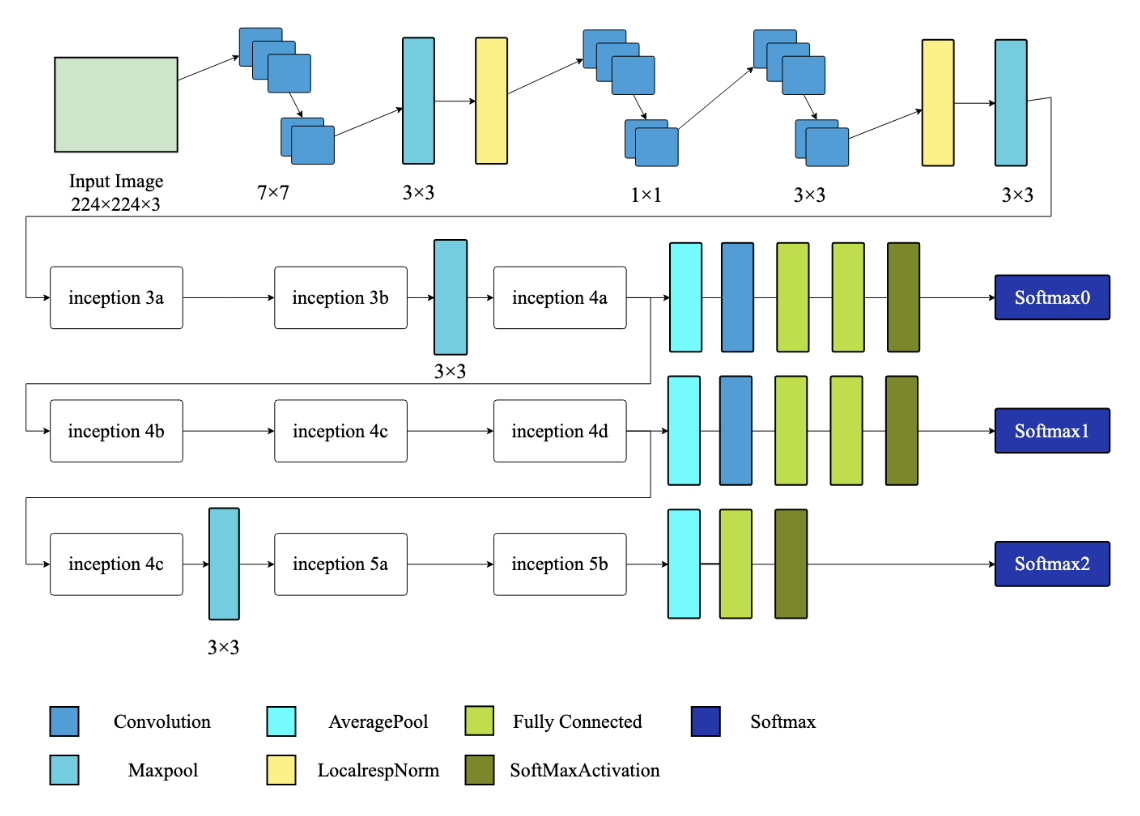

###Advantages:

1.The Inception architecture extracts detailed and diverse features by using multiple filter sizes in parallel, capturing more useful information with less computational cost.

2.Supports transfer learning, allowing fine-tuning of a pre-trained model to enhance performance with limited data.

3.The use of auxiliary classifiers reduces the risk of vanishing gradients, enabling more stable training of deep networks.

4.Efficient parameter utilization allows the model to maintain high accuracy with relatively low computational costs.

###Support:
GoogLeNet's ability to extract multi-scale features makes it particularly suitable for tasks such as skin lesion classification in medical imaging, where accurate identification of subtle details is crucial. Furthermore, due to its parameter-efficient architecture, GoogLeNet is well-suited for use in resource-constrained environments, such as mobile devices or embedded systems for real-time image classification.

In [ ]:
#GoogleNet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
def googlenet_train(dataset_type, batch_size, num_classes, lr, epoch_num, optim_value, optim_type, pretrained):
    def save_ckpt(path):
        torch.save({
            "cur_itrs": cur_itrs,
            "model_state": model.state_dict(),  # 移除.module
            "optimizer_state": optimizer.state_dict(),
            "best_score": best_score,
        }, path)

    # File paths
    train_image_file = './dataset/npy/train_%s_images.npy' % dataset_type
    train_label_file = './dataset/npy/train_%s_labels.npy' % dataset_type
    val_image_file = './dataset/npy/val_%s_images.npy' % dataset_type
    val_label_file = './dataset/npy/val_%s_labels.npy' % dataset_type
    ckpt = 'checkpoints/latest_googlenet_%s.pth' % dataset_type

    train_losses, f1_list, accuracy_list = [], [], []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: %s" % device)

    train_loader = load_dataloader_from_npy(train_image_file, train_label_file, batch_size, shuffle=True)
    val_loader = load_dataloader_from_npy(val_image_file, val_label_file, batch_size, shuffle=False)
    print("Training set: %d, Validation set: %d" % (len(train_loader) * batch_size, len(val_loader) * batch_size))

    data_count = len(train_loader)
    total_itrs = data_count * epoch_num

    model = models.googlenet(pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)

    model = nn.DataParallel(model)
    model = model.to(device)

    if optim_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=optim_value)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4700, gamma=0.1)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=optim_value)

    criterion = nn.CrossEntropyLoss()
    os.makedirs('./checkpoints', exist_ok=True)

    best_score = 0.0
    cur_itrs = 0
    cur_epochs = 0

    if ckpt is not None and os.path.isfile(ckpt):
        try:
            checkpoint = torch.load(ckpt)
            model.load_state_dict(checkpoint["model_state"])
            optimizer.load_state_dict(checkpoint["optimizer_state"])
            cur_itrs = checkpoint["cur_itrs"]
            best_score = checkpoint["best_score"]
            print("Model restored from %s" % ckpt)
            del checkpoint
        except Exception as e:
            print(f"Failed to load checkpoint: {e}")
            print("Training from scratch")
    else:
        print("[!] Training from scratch")

    t_loss = 0
    patience = 3
    no_improve = 0

    while True:
        model.train()
        cur_epochs += 1

        for images, labels in train_loader:
            cur_itrs += 1
            images = images.to(device)
            labels = labels.to(device)
            labels = torch.argmax(labels, dim=1)

            optimizer.zero_grad()

            # Handle auxiliary outputs
            if model.module.training and hasattr(model.module, 'aux_logits'):
                outputs, aux1, aux2 = model(images)
                loss1 = criterion(outputs, labels)
                loss2 = criterion(aux1, labels)
                loss3 = criterion(aux2, labels)
                loss = loss1 + 0.3 * (loss2 + loss3)
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            if optim_type == "Adam":
                scheduler.step()

            t_loss += loss.item()

            if cur_itrs % data_count == 0:
                t_loss = t_loss / data_count
                train_losses.append(t_loss)
                print("Epoch %d, Itrs %d/%d, Loss=%f" % (cur_epochs, cur_itrs, total_itrs, t_loss))
                t_loss = 0.0

                save_ckpt(ckpt)

                model.eval()
                f1_s, accuracy = validate(model=model, loader=val_loader, device=device)
                f1_list.append(f1_s)
                accuracy_list.append(accuracy)

                if f1_s > best_score:
                    best_score = f1_s
                    no_improve = 0
                    save_ckpt("checkpoints/best_googlenet_%s.pth" % dataset_type)
                else:
                    no_improve += 1

                model.train()

        if cur_itrs >= total_itrs or no_improve >= patience:
            save_results_to_file(train_losses, f1_list, accuracy_list, dataset_type, "googlenet")
            if cur_itrs < total_itrs:
                print("Early Stop")
            return

def predict_and_evaluate_googlenet(dataset_type, test_image_file, test_label_file, pretrained):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    batch_size = 32
    num_classes = 7
    label_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
    ckpt = 'checkpoints/best_googlenet_%s.pth' % dataset_type

    test_loader = load_dataloader_from_npy(test_image_file, test_label_file, batch_size, shuffle=True)

    # Initialize model
    model = models.googlenet(pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    model = nn.DataParallel(model)
    model = model.to(device)

    if ckpt is not None and os.path.isfile(ckpt):
        try:
            checkpoint = torch.load(ckpt)
            model.load_state_dict(checkpoint["model_state"])
            print("Resume model from %s" % ckpt)
            del checkpoint
        except Exception as e:
            print(f"Failed to load checkpoint: {e}")
            print("[!] Retrain required")
            return
    else:
        print("[!] Retrain required")
        return

    model.eval()

    all_tgs = []
    all_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)
            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    print(classification_report(all_tgs, all_pred, target_names=label_names, zero_division=0))

    cm = confusion_matrix(all_tgs, all_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# Required Libraries
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Dataset Class
class NpyDataset(Dataset):
    def __init__(self, image_file, label_file):
        self.images = np.load(image_file)
        self.labels = np.load(label_file)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label

# Data Loading Function
def load_dataloader_from_npy(image_file, label_file, batch_size, shuffle=True):
    dataset = NpyDataset(image_file=image_file, label_file=label_file)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Validation Function
def validate(model, loader, device):
    all_tgs = []
    all_pred = []
    with torch.no_grad():
        for images, labels in tqdm(loader):
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)
            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    f1_macro = f1_score(all_tgs, all_pred, average="macro")
    accuracy = accuracy_score(all_tgs, all_pred)
    return f1_macro, accuracy

# Save Results Function
def save_results_to_file(losses, f1_list, accu_list, dataset_type, model_name):
    os.makedirs("./result", exist_ok=True)
    losses_path = './result/train_losses_%s_%s.csv' % (dataset_type, model_name)
    f1_scores_path = './result/f1_scores_%s_%s.csv' % (dataset_type, model_name)
    accuracy_path = './result/accuracies_%s_%s.csv' % (dataset_type, model_name)

    with open(losses_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Loss"])
        for i, loss in enumerate(losses):
            writer.writerow([i + 1, loss])

    with open(f1_scores_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "F1 Score"])
        for i, f1 in enumerate(f1_list):
            writer.writerow([i + 1, f1])

    with open(accuracy_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Accuracy"])
        for i, acc in enumerate(accu_list):
            writer.writerow([i + 1, acc])

# Data Loading Helper Function
def load_data(filename):
    iterations = []
    values = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            iterations.append(int(row[0]))
            values.append(float(row[1]))
    return iterations, values

# Analysis Function
def analyze_training(dataset_type, model_name):
    losses_path = './result/train_losses_%s_%s.csv' % (dataset_type, model_name)
    f1_scores_path = './result/f1_scores_%s_%s.csv' % (dataset_type, model_name)
    accuracy_path = './result/accuracies_%s_%s.csv' % (dataset_type, model_name)

    iterations, f1_score = load_data(f1_scores_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, f1_score, label="F1 Score")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("Validation F1 Score Curves")
    plt.legend()
    plt.show()

    iterations, accuracy = load_data(accuracy_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, accuracy, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()
    plt.show()

    iterations, train_losses = load_data(losses_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, train_losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()
    plt.show()

In [ ]:
# non-pretrain
googlenet_train("o", 32, 7, 0.001, 32, 1e-5, "Adam", False)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


[!] Training from scratch
Epoch 1, Itrs 1174/37568, Loss=2.046363


100%|██████████| 294/294 [00:05<00:00, 55.11it/s]


Epoch 2, Itrs 2348/37568, Loss=1.493575


100%|██████████| 294/294 [00:05<00:00, 54.39it/s]


Epoch 3, Itrs 3522/37568, Loss=1.125475


100%|██████████| 294/294 [00:05<00:00, 51.76it/s]


Epoch 4, Itrs 4696/37568, Loss=0.901818


100%|██████████| 294/294 [00:05<00:00, 54.10it/s]


Epoch 5, Itrs 5870/37568, Loss=0.568601


100%|██████████| 294/294 [00:05<00:00, 52.62it/s]


Epoch 6, Itrs 7044/37568, Loss=0.472577


100%|██████████| 294/294 [00:05<00:00, 52.96it/s]


Epoch 7, Itrs 8218/37568, Loss=0.410067


100%|██████████| 294/294 [00:05<00:00, 53.51it/s]


Epoch 8, Itrs 9392/37568, Loss=0.355926


100%|██████████| 294/294 [00:05<00:00, 53.00it/s]


Epoch 9, Itrs 10566/37568, Loss=0.301569


100%|██████████| 294/294 [00:05<00:00, 53.02it/s]


Epoch 10, Itrs 11740/37568, Loss=0.292453


100%|██████████| 294/294 [00:05<00:00, 53.36it/s]


Epoch 11, Itrs 12914/37568, Loss=0.279793


100%|██████████| 294/294 [00:05<00:00, 53.52it/s]


Epoch 12, Itrs 14088/37568, Loss=0.274541


100%|██████████| 294/294 [00:05<00:00, 53.35it/s]


Epoch 13, Itrs 15262/37568, Loss=0.267050


100%|██████████| 294/294 [00:05<00:00, 54.39it/s]


Epoch 14, Itrs 16436/37568, Loss=0.267210


100%|██████████| 294/294 [00:05<00:00, 51.23it/s]


Epoch 15, Itrs 17610/37568, Loss=0.264243


100%|██████████| 294/294 [00:05<00:00, 54.31it/s]


Epoch 16, Itrs 18784/37568, Loss=0.262391


100%|██████████| 294/294 [00:05<00:00, 54.22it/s]


Epoch 17, Itrs 19958/37568, Loss=0.264173


100%|██████████| 294/294 [00:05<00:00, 52.34it/s]


Epoch 18, Itrs 21132/37568, Loss=0.264909


100%|██████████| 294/294 [00:05<00:00, 54.17it/s]


Epoch 19, Itrs 22306/37568, Loss=0.262182


100%|██████████| 294/294 [00:05<00:00, 51.63it/s]


Epoch 20, Itrs 23480/37568, Loss=0.263729


100%|██████████| 294/294 [00:05<00:00, 54.04it/s]


Epoch 21, Itrs 24654/37568, Loss=0.257822


100%|██████████| 294/294 [00:05<00:00, 54.11it/s]


Early Stop


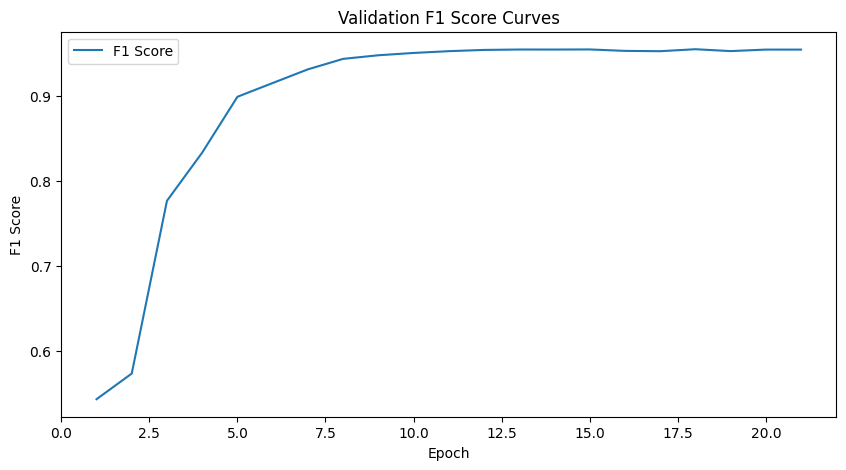

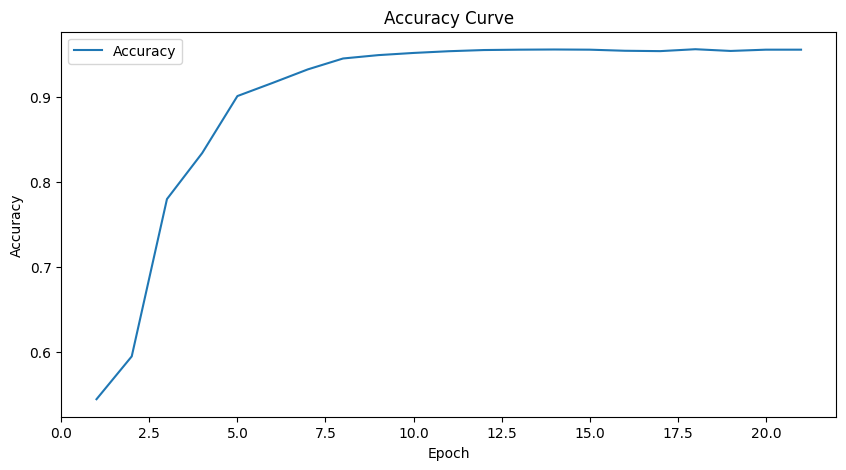

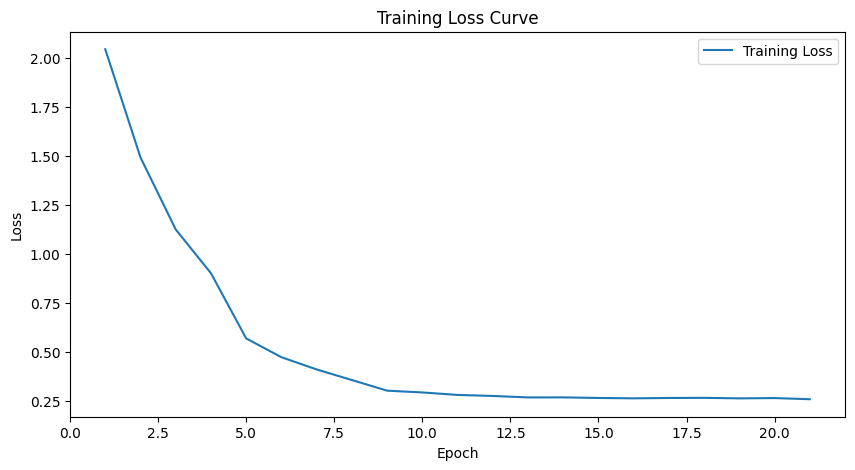

In [ ]:
analyze_training("o", "googlenet")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
<ipython-input-3-509a9d3358f9>:148: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the d

Resume model from checkpoints/best_googlenet_o.pth
              precision    recall  f1-score   support

         MEL       0.25      0.73      0.37       171
          NV       0.99      0.47      0.64       909
         BCC       0.44      0.31      0.36        93
       AKIEC       0.22      0.30      0.25        43
         BKL       0.34      0.62      0.44       217
          DF       0.29      0.20      0.24        44
        VASC       0.64      0.66      0.65        35

    accuracy                           0.50      1512
   macro avg       0.45      0.47      0.42      1512
weighted avg       0.73      0.50      0.54      1512



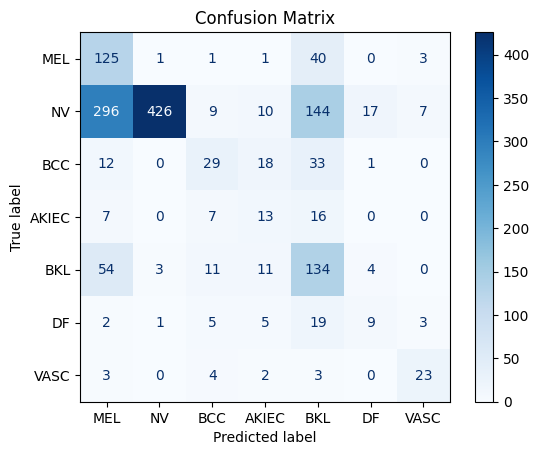

In [ ]:
test_image_file = './dataset/npy/test_images.npy'
test_label_file = './dataset/npy/test_labels.npy'


predict_and_evaluate_googlenet("o", test_image_file, test_label_file, False)

In [ ]:
# pretrain
googlenet_train("o", 32, 7, 0.01, 32, 1e-5, "Adam", True)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
<ipython-input-3-509a9d3358f9>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the de

Model restored from checkpoints/latest_googlenet_o.pth
Epoch 1, Itrs 7044/37568, Loss=0.714637


100%|██████████| 294/294 [00:05<00:00, 51.63it/s]


Epoch 2, Itrs 8218/37568, Loss=0.594547


100%|██████████| 294/294 [00:05<00:00, 53.41it/s]


Epoch 3, Itrs 9392/37568, Loss=0.506676


100%|██████████| 294/294 [00:05<00:00, 53.69it/s]


Epoch 4, Itrs 10566/37568, Loss=0.432970


100%|██████████| 294/294 [00:05<00:00, 52.96it/s]


Epoch 5, Itrs 11740/37568, Loss=0.334913


100%|██████████| 294/294 [00:05<00:00, 51.67it/s]


Epoch 6, Itrs 12914/37568, Loss=0.305160


100%|██████████| 294/294 [00:05<00:00, 53.70it/s]


Epoch 7, Itrs 14088/37568, Loss=0.284101


100%|██████████| 294/294 [00:05<00:00, 52.64it/s]


Epoch 8, Itrs 15262/37568, Loss=0.275238


100%|██████████| 294/294 [00:05<00:00, 52.57it/s]


Epoch 9, Itrs 16436/37568, Loss=0.263932


100%|██████████| 294/294 [00:05<00:00, 53.00it/s]


Epoch 10, Itrs 17610/37568, Loss=0.260267


100%|██████████| 294/294 [00:05<00:00, 52.79it/s]


Epoch 11, Itrs 18784/37568, Loss=0.257328


100%|██████████| 294/294 [00:05<00:00, 53.34it/s]


Epoch 12, Itrs 19958/37568, Loss=0.256035


100%|██████████| 294/294 [00:05<00:00, 52.67it/s]


Epoch 13, Itrs 21132/37568, Loss=0.250378


100%|██████████| 294/294 [00:05<00:00, 53.05it/s]


Epoch 14, Itrs 22306/37568, Loss=0.250918


100%|██████████| 294/294 [00:05<00:00, 52.37it/s]


Early Stop


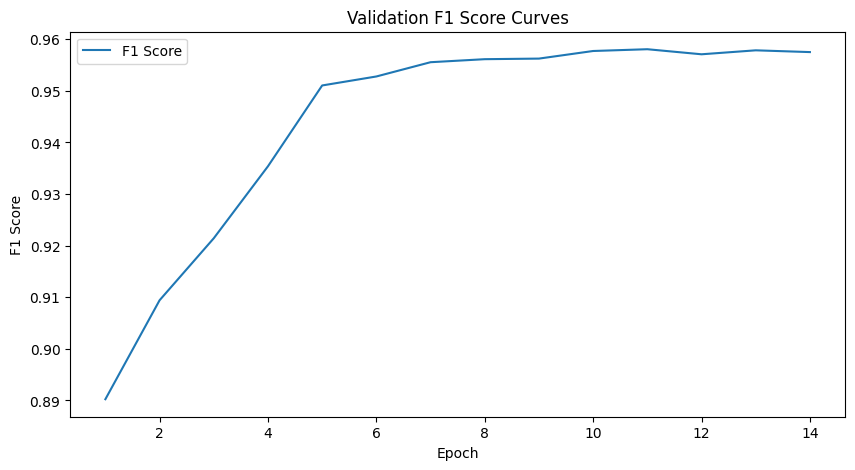

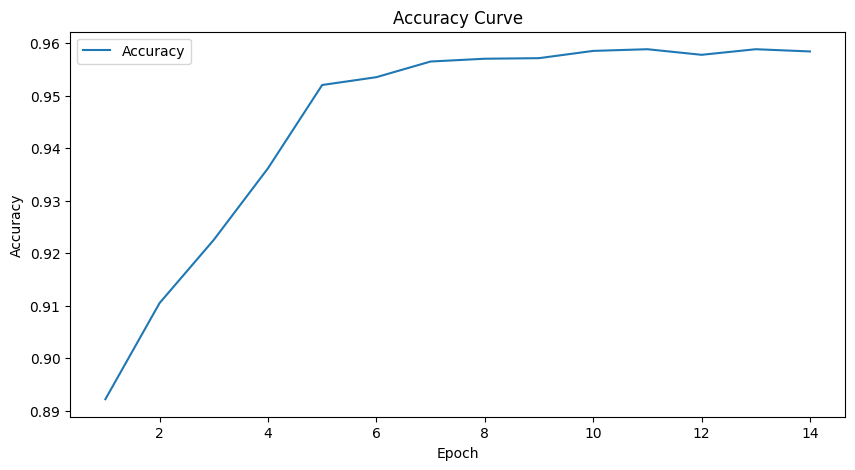

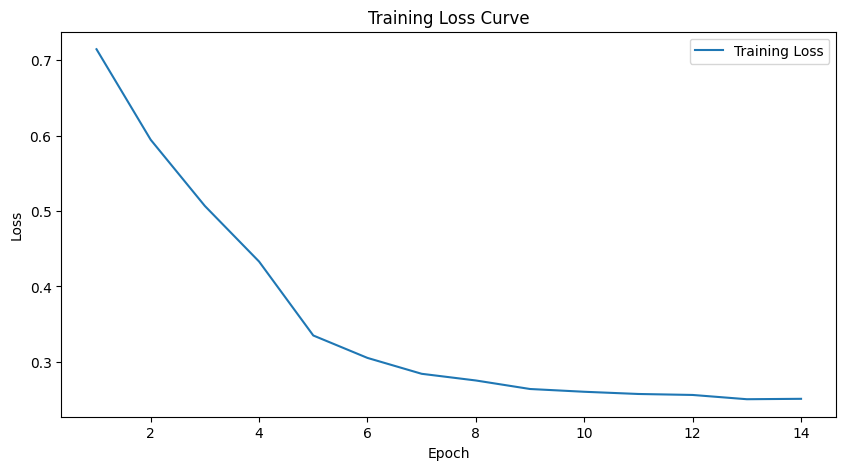

In [ ]:
analyze_training("o", "googlenet")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
<ipython-input-3-509a9d3358f9>:148: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the d

Resume model from checkpoints/best_googlenet_o.pth
              precision    recall  f1-score   support

         MEL       0.27      0.67      0.38       171
          NV       0.94      0.59      0.72       909
         BCC       0.33      0.53      0.40        93
       AKIEC       0.21      0.51      0.30        43
         BKL       0.43      0.34      0.38       217
          DF       0.26      0.18      0.21        44
        VASC       0.33      0.57      0.42        35

    accuracy                           0.54      1512
   macro avg       0.40      0.48      0.40      1512
weighted avg       0.70      0.54      0.58      1512



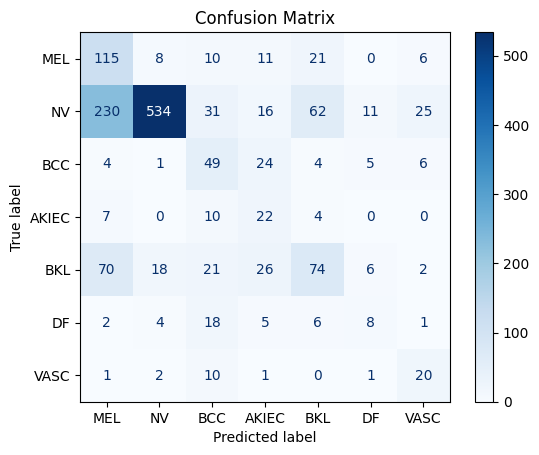

In [ ]:
test_image_file = './dataset/npy/test_images.npy'
test_label_file = './dataset/npy/test_labels.npy'


predict_and_evaluate_googlenet("o", test_image_file, test_label_file, False)

##Model3: ResNet50

ResNet50 is a 50-layer deep residual network known for its strong performance in image classification tasks. The core innovation of ResNet50 is the introduction of residual connections, which solve the vanishing gradient and degradation problems in deep networks by allowing information to bypass layers. The residual blocks enable the model to maintain high accuracy even as the network depth increases, avoiding performance degradation. Additionally, ResNet50 employs layer normalization and batch normalization to further stabilize the training process and improve generalization.

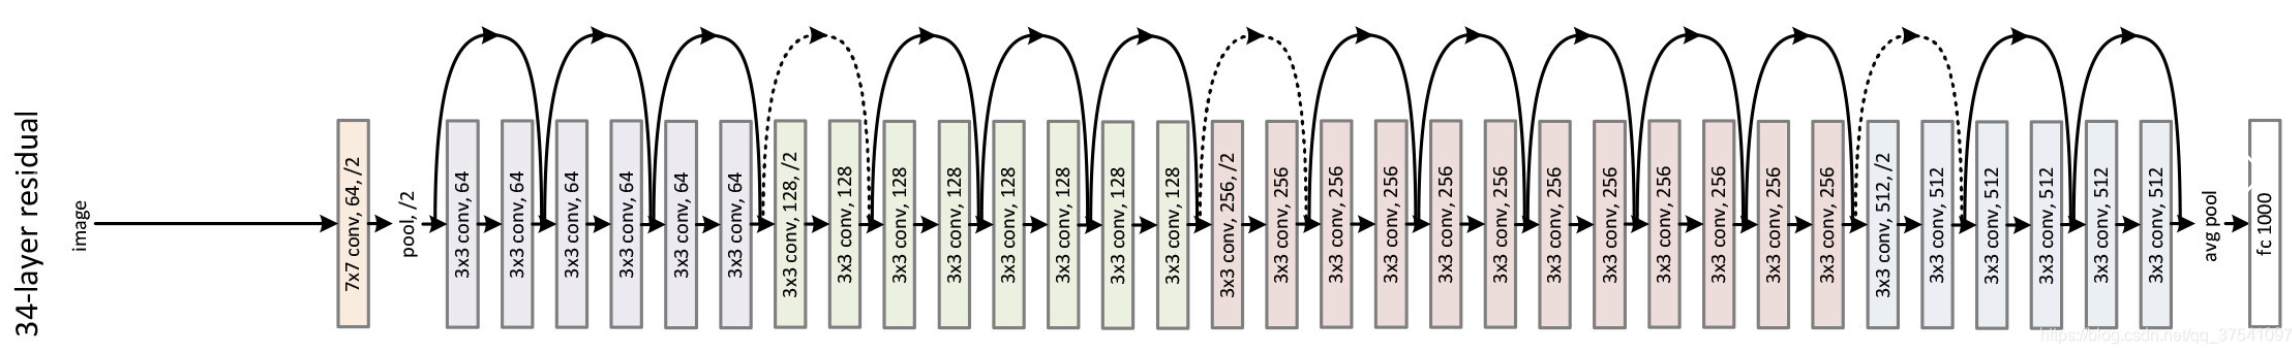

###Advantages:

1.ResNet50's deep architecture can extract multi-level features from images, making it especially useful for complex visual tasks.

2.Supports fine-tuning of pre-trained models, improving performance with limited training data and effectively reducing reliance on large annotated datasets.

3.The residual structure effectively mitigates the vanishing gradient problem, enabling efficient training even as network depth increases.

4.Batch normalization and layer normalization improve training stability and speed up convergence.

###Support:
Due to its efficient feature extraction capabilities, ResNet50 is an ideal choice for skin lesion classification in medical imaging. It can capture subtle features in images, making it particularly suitable for high-precision classification tasks, such as skin cancer detection. In addition, ResNet50 excels in handling complex visual tasks, making it applicable to other scenarios that require high-resolution feature extraction by deep learning models.

In [ ]:
## Resnet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/9444/project'

/content/drive/MyDrive/9444/project


In [ ]:
import torch

print("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [ ]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision import models
from torch.utils.data import DataLoader
from sklearn.metrics import *
import numpy as np


def save_results_to_file(losses, f1_list, accu_list, dataset_type, model_name):
    os.makedirs("./result", exist_ok=True)
    losses_path = './result/train_losses_%s_%s.csv' % (dataset_type, model_name)
    f1_scores_path = './result/f1_scores_%s_%s.csv' % (dataset_type, model_name)
    accuracy_path = './result/accuracies_%s_%s.csv' % (dataset_type, model_name)

    with open(losses_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Loss"])
        for i, loss in enumerate(losses):
            writer.writerow([i + 1, loss])

    with open(f1_scores_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "F1 Score"])
        for i, f1 in enumerate(f1_list):
            writer.writerow([i + 1, f1])

    with open(accuracy_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Accuracy"])
        for i, acc in enumerate(accu_list):
            writer.writerow([i + 1, acc])


class NpyDataset(Dataset):
    def __init__(self, image_file, label_file):
        self.images = np.load(image_file)
        self.labels = np.load(label_file)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label


def load_dataloader_from_npy(image_file, label_file, batch_size, shuffle=True):
    dataset = NpyDataset(image_file=image_file, label_file=label_file)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


def validate(model, loader, device):
    all_tgs = []
    all_pred = []

    with torch.no_grad():
        for images, labels in tqdm(loader):
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)

            outputs = model(images)
            _, pred = torch.max(outputs, 1)

            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    f1_macro = f1_score(all_tgs, all_pred, average="macro")  # micro weighted
    accuracy = accuracy_score(all_tgs, all_pred)
    return f1_macro, accuracy

In [ ]:
def resnet50_train(dataset_type, batch_size, num_classes, lr, epoch_num, optim_value, optim_type, pretrained):
    def save_ckpt(path):
        torch.save({
              "cur_itrs": cur_itrs,
            "model_state": model.module.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "best_score": best_score,
        }, path)

    train_image_file = './dataset/npy/train_%s_images.npy' % dataset_type
    train_label_file = './dataset/npy/train_%s_labels.npy' % dataset_type
    val_image_file = './dataset/npy/val_%s_images.npy' % dataset_type
    val_label_file = './dataset/npy/val_%s_labels.npy' % dataset_type
    ckpt = 'checkpoints/latest_resnet50_%s.pth' % dataset_type
    train_losses, f1_list, accuracy_list = [], [], []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device: %s" % device)

    train_loader = load_dataloader_from_npy(train_image_file, train_label_file, batch_size, shuffle=True)
    val_loader = load_dataloader_from_npy(val_image_file, val_label_file, batch_size, shuffle=False)
    print("Training set: %d, Validation set: %d" % (len(train_loader) * batch_size, len(val_loader) * batch_size))

    data_count = len(train_loader)
    total_itrs = data_count * epoch_num

    model = models.resnet50(pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)

    if optim_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=optim_value)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4700, gamma=0.1)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=optim_value)

    criterion = nn.CrossEntropyLoss()

    os.makedirs('./checkpoints', exist_ok=True)

    best_score = 0.0
    cur_itrs = 0
    cur_epochs = 0

    if ckpt is not None and os.path.isfile(ckpt):
        checkpoint = torch.load(ckpt, map_location=torch.device('cpu'))
        model.load_state_dict(checkpoint["model_state"])
        model = nn.DataParallel(model)
        print("Model restored from %s" % ckpt)
        del checkpoint
    else:
        print("[!] Not restoring, training from scratch")
        model = nn.DataParallel(model)

    model = model.to(device)

    # Training loop
    t_loss = 0
    patience = 3
    no_improve = 0

    while True:
        model.train()
        cur_epochs += 1
        for images, labels in train_loader:
            cur_itrs += 1
            images = images.to(device)
            labels = labels.to(device)
            labels = torch.argmax(labels, dim=1)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            if optim_type == "Adam":
                scheduler.step()
            t_loss += loss.item()

            if cur_itrs % data_count == 0:
                t_loss = t_loss / data_count
                train_losses.append(t_loss)
                print("Epoch %d, Itrs %d/%d, Loss=%f" % (cur_epochs, cur_itrs, total_itrs, t_loss))
                t_loss = 0.0

                save_ckpt(ckpt)
                model.eval()
                f1_s, accuracy = validate(model=model, loader=val_loader, device=device)
                f1_list.append(f1_s)
                accuracy_list.append(accuracy)
                if f1_s > best_score:
                    best_score = f1_s
                    no_improve = 0
                    save_ckpt("checkpoints/best_resnet50_%s.pth" % dataset_type)
                else:
                    no_improve += 1
                model.train()

            if cur_itrs >= total_itrs or no_improve >= patience:
                save_results_to_file(train_losses, f1_list, accuracy_list, dataset_type, "resnet50")
                if cur_itrs < total_itrs:
                    print("Early Stop ")
                return

In [ ]:
def predict_and_evaluate(dataset_type, test_image_file, test_label_file, model_name,pretrained):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    batch_size = 32
    num_classes = 7
    label_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
    ckpt = 'checkpoints/best_%s_%s.pth' % (model_name, dataset_type)

    test_loader = load_dataloader_from_npy(test_image_file, test_label_file, batch_size, shuffle=True)

    model = models.resnet50(pretrained=pretrained)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)


    if ckpt is not None and os.path.isfile(ckpt):
        checkpoint = torch.load(ckpt, map_location=torch.device('cpu'))
        model.load_state_dict(checkpoint["model_state"])
        model = nn.DataParallel(model)
        print("Resume model from %s" % ckpt)
        del checkpoint
    else:
        print("[!] Retrain")
        model = nn.DataParallel(model)
    model.to(device)

    model.eval()
    all_tgs = []
    all_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)
            labels = torch.argmax(labels, dim=1)

            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            all_tgs.extend(labels.cpu().numpy())
            all_pred.extend(pred.cpu().numpy())

    print(classification_report(all_tgs, all_pred, target_names=label_names, zero_division=0))

    cm = confusion_matrix(all_tgs, all_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


test_image_file = './dataset/npy/test_images.npy'
test_label_file = './dataset/npy/test_labels.npy'

In [ ]:
import csv
import os
import matplotlib.pyplot as plt


def load_data(filename):
    iterations = []
    values = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            iterations.append(int(row[0]))
            values.append(float(row[1]))
    return iterations, values


def analyze_training(dataset_type, model_name):
    losses_path = './result/train_losses_%s_%s.csv' % (dataset_type, model_name)
    f1_scores_path = './result/f1_scores_%s_%s.csv' % (dataset_type, model_name)
    accuracy_path = './result/accuracies_%s_%s.csv' % (dataset_type, model_name)

    iterations, f1_score = load_data(f1_scores_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, f1_score, label="F1 Score")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("Validation F1 Score Curves")
    plt.legend()
    plt.show()

    iterations, accuracy = load_data(accuracy_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, accuracy, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()
    plt.show()

    iterations, train_losses = load_data(losses_path)
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, train_losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()
    plt.show()

In [ ]:
# non-pretrain
resnet50_train("o", 32, 7, 0.005, 32, 1e-4, "Adam", False)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[!] Not restoring, training from scratch
Epoch 1, Itrs 1174/37568, Loss=1.494152


100%|██████████| 294/294 [00:06<00:00, 46.75it/s]


Epoch 2, Itrs 2348/37568, Loss=1.148881


100%|██████████| 294/294 [00:06<00:00, 47.27it/s]


Epoch 3, Itrs 3522/37568, Loss=0.927911


100%|██████████| 294/294 [00:06<00:00, 47.13it/s]


Epoch 4, Itrs 4696/37568, Loss=0.745758


100%|██████████| 294/294 [00:06<00:00, 47.34it/s]


Epoch 5, Itrs 5870/37568, Loss=0.493832


100%|██████████| 294/294 [00:06<00:00, 47.46it/s]


Epoch 6, Itrs 7044/37568, Loss=0.393453


100%|██████████| 294/294 [00:06<00:00, 47.40it/s]


Epoch 7, Itrs 8218/37568, Loss=0.335881


100%|██████████| 294/294 [00:06<00:00, 47.27it/s]


Epoch 8, Itrs 9392/37568, Loss=0.287252


100%|██████████| 294/294 [00:06<00:00, 47.73it/s]


Epoch 9, Itrs 10566/37568, Loss=0.233130


100%|██████████| 294/294 [00:06<00:00, 47.27it/s]


Epoch 10, Itrs 11740/37568, Loss=0.216708


100%|██████████| 294/294 [00:06<00:00, 46.92it/s]


Epoch 11, Itrs 12914/37568, Loss=0.206156


100%|██████████| 294/294 [00:06<00:00, 47.67it/s]


Epoch 12, Itrs 14088/37568, Loss=0.196420


100%|██████████| 294/294 [00:06<00:00, 46.77it/s]


Epoch 13, Itrs 15262/37568, Loss=0.187524


100%|██████████| 294/294 [00:06<00:00, 46.79it/s]


Epoch 14, Itrs 16436/37568, Loss=0.189147


100%|██████████| 294/294 [00:06<00:00, 46.43it/s]


Epoch 15, Itrs 17610/37568, Loss=0.187513


100%|██████████| 294/294 [00:06<00:00, 46.94it/s]


Epoch 16, Itrs 18784/37568, Loss=0.183868


100%|██████████| 294/294 [00:06<00:00, 47.54it/s]


Epoch 17, Itrs 19958/37568, Loss=0.183277


100%|██████████| 294/294 [00:06<00:00, 47.38it/s]


Epoch 18, Itrs 21132/37568, Loss=0.180914


100%|██████████| 294/294 [00:06<00:00, 46.23it/s]


Epoch 19, Itrs 22306/37568, Loss=0.181946


100%|██████████| 294/294 [00:06<00:00, 47.47it/s]


Epoch 20, Itrs 23480/37568, Loss=0.184673


100%|██████████| 294/294 [00:06<00:00, 47.19it/s]


Early Stop 


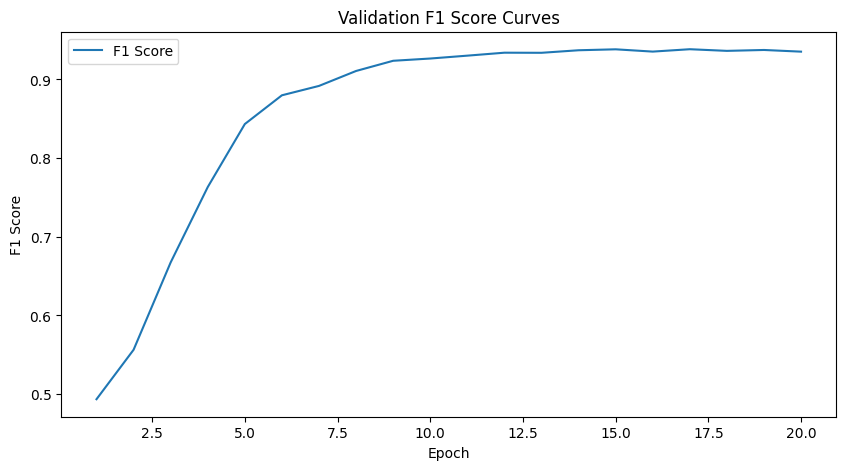

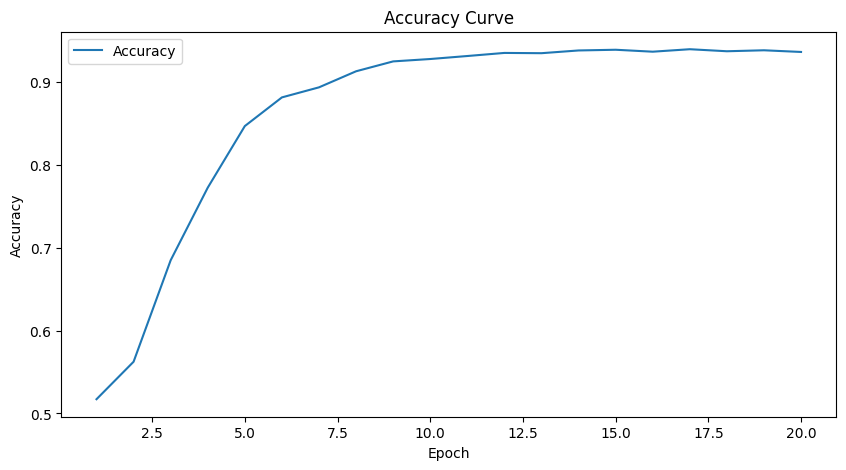

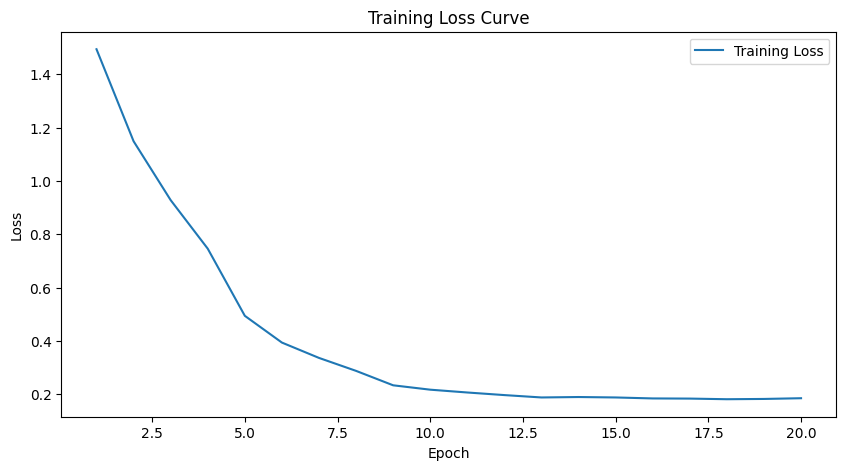

In [ ]:
analyze_training("o", "resnet50")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-6-c817c757975b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

Resume model from checkpoints/best_resnet50_o.pth
              precision    recall  f1-score   support

         MEL       0.30      0.57      0.39       171
          NV       0.90      0.68      0.77       909
         BCC       0.38      0.45      0.41        93
       AKIEC       0.25      0.35      0.29        43
         BKL       0.36      0.48      0.41       217
          DF       0.32      0.14      0.19        44
        VASC       0.56      0.40      0.47        35

    accuracy                           0.59      1512
   macro avg       0.44      0.44      0.42      1512
weighted avg       0.68      0.59      0.62      1512



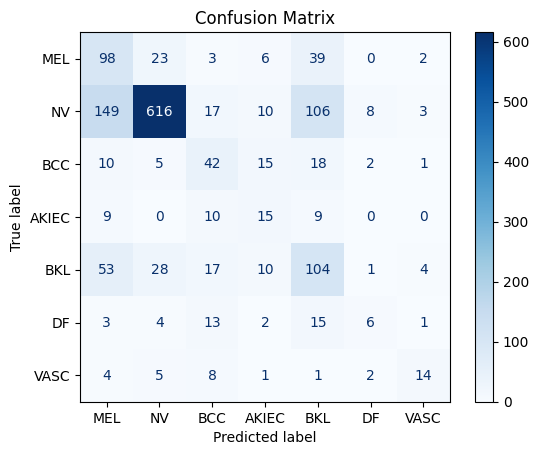

In [ ]:
predict_and_evaluate("o", test_image_file, test_label_file, "resnet50", False)

In [ ]:
# pretrain
resnet50_train("o", 32, 7, 0.005, 32, 1e-4, "Adam", True)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s]


[!] Not restoring, training from scratch
Epoch 1, Itrs 1174/37568, Loss=1.463209


100%|██████████| 294/294 [00:06<00:00, 46.91it/s]


Epoch 2, Itrs 2348/37568, Loss=1.056644


100%|██████████| 294/294 [00:06<00:00, 47.26it/s]


Epoch 3, Itrs 3522/37568, Loss=0.823037


100%|██████████| 294/294 [00:06<00:00, 46.80it/s]


Epoch 4, Itrs 4696/37568, Loss=0.656456


100%|██████████| 294/294 [00:06<00:00, 47.13it/s]


Epoch 5, Itrs 5870/37568, Loss=0.422615


100%|██████████| 294/294 [00:06<00:00, 47.29it/s]


Epoch 6, Itrs 7044/37568, Loss=0.340036


100%|██████████| 294/294 [00:06<00:00, 46.82it/s]


Epoch 7, Itrs 8218/37568, Loss=0.287103


100%|██████████| 294/294 [00:06<00:00, 47.63it/s]


Epoch 8, Itrs 9392/37568, Loss=0.242454


100%|██████████| 294/294 [00:06<00:00, 47.16it/s]


Epoch 9, Itrs 10566/37568, Loss=0.191853


100%|██████████| 294/294 [00:06<00:00, 46.40it/s]


Epoch 10, Itrs 11740/37568, Loss=0.177786


100%|██████████| 294/294 [00:06<00:00, 47.22it/s]


Epoch 11, Itrs 12914/37568, Loss=0.169641


100%|██████████| 294/294 [00:06<00:00, 47.38it/s]


Epoch 12, Itrs 14088/37568, Loss=0.159862


100%|██████████| 294/294 [00:06<00:00, 46.62it/s]


Epoch 13, Itrs 15262/37568, Loss=0.154206


100%|██████████| 294/294 [00:06<00:00, 46.96it/s]


Epoch 14, Itrs 16436/37568, Loss=0.151100


100%|██████████| 294/294 [00:06<00:00, 47.01it/s]


Epoch 15, Itrs 17610/37568, Loss=0.152640


100%|██████████| 294/294 [00:06<00:00, 46.85it/s]


Epoch 16, Itrs 18784/37568, Loss=0.151064


100%|██████████| 294/294 [00:06<00:00, 47.68it/s]


Epoch 17, Itrs 19958/37568, Loss=0.150166


100%|██████████| 294/294 [00:06<00:00, 47.55it/s]


Epoch 18, Itrs 21132/37568, Loss=0.149515


100%|██████████| 294/294 [00:06<00:00, 46.87it/s]


Early Stop 


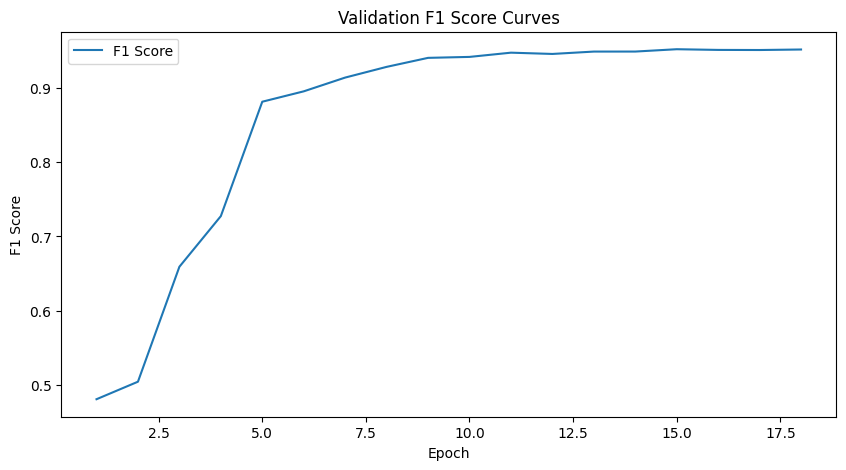

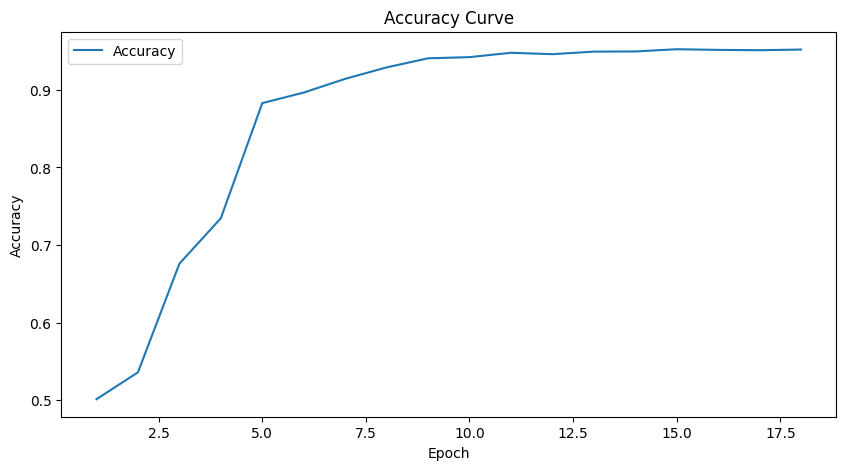

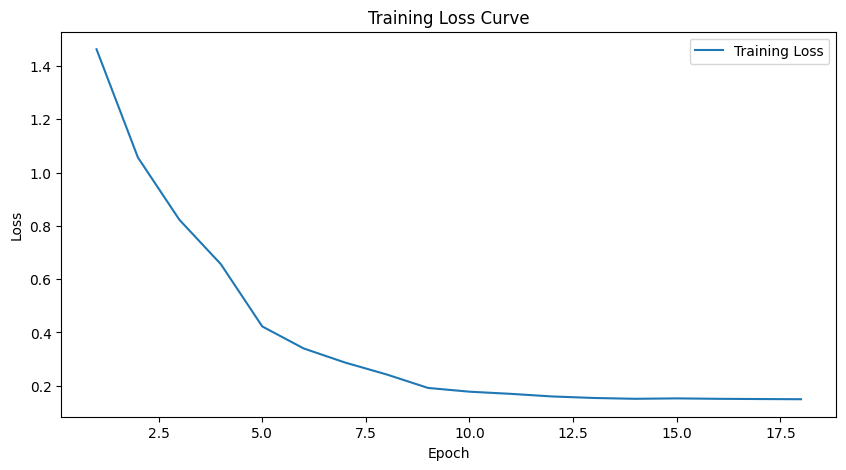

In [ ]:
analyze_training("o", "resnet50")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-7-c817c757975b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

Resume model from checkpoints/best_resnet50_o.pth
              precision    recall  f1-score   support

         MEL       0.34      0.58      0.43       171
          NV       0.89      0.73      0.80       909
         BCC       0.40      0.38      0.39        93
       AKIEC       0.25      0.26      0.25        43
         BKL       0.37      0.50      0.43       217
          DF       0.39      0.20      0.27        44
        VASC       0.68      0.49      0.57        35

    accuracy                           0.62      1512
   macro avg       0.47      0.45      0.45      1512
weighted avg       0.68      0.62      0.64      1512



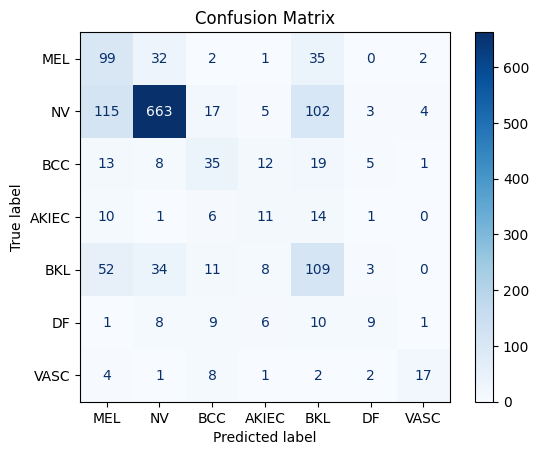

In [ ]:
predict_and_evaluate("o", test_image_file, test_label_file, "resnet50", True)

In [ ]:
# use augmented dataset
resnet50_train("e", 32, 7, 0.005, 32, 1e-4, "Adam", True)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[!] Not restoring, training from scratch
Epoch 1, Itrs 1174/37568, Loss=1.347167


100%|██████████| 294/294 [00:06<00:00, 47.01it/s]


Epoch 2, Itrs 2348/37568, Loss=1.082983


100%|██████████| 294/294 [00:06<00:00, 47.20it/s]


Epoch 3, Itrs 3522/37568, Loss=0.954123


100%|██████████| 294/294 [00:06<00:00, 47.39it/s]


Epoch 4, Itrs 4696/37568, Loss=0.851195


100%|██████████| 294/294 [00:06<00:00, 46.98it/s]


Epoch 5, Itrs 5870/37568, Loss=0.688953


100%|██████████| 294/294 [00:06<00:00, 46.55it/s]


Epoch 6, Itrs 7044/37568, Loss=0.636076


100%|██████████| 294/294 [00:06<00:00, 47.11it/s]


Epoch 7, Itrs 8218/37568, Loss=0.606205


100%|██████████| 294/294 [00:06<00:00, 46.54it/s]


Epoch 8, Itrs 9392/37568, Loss=0.578498


100%|██████████| 294/294 [00:06<00:00, 46.61it/s]


Epoch 9, Itrs 10566/37568, Loss=0.543296


100%|██████████| 294/294 [00:06<00:00, 46.76it/s]


Epoch 10, Itrs 11740/37568, Loss=0.536307


100%|██████████| 294/294 [00:06<00:00, 47.00it/s]


Epoch 11, Itrs 12914/37568, Loss=0.526389


100%|██████████| 294/294 [00:06<00:00, 47.19it/s]


Epoch 12, Itrs 14088/37568, Loss=0.523771


100%|██████████| 294/294 [00:06<00:00, 47.46it/s]


Epoch 13, Itrs 15262/37568, Loss=0.519004


100%|██████████| 294/294 [00:06<00:00, 47.01it/s]


Epoch 14, Itrs 16436/37568, Loss=0.518284


100%|██████████| 294/294 [00:06<00:00, 47.29it/s]


Epoch 15, Itrs 17610/37568, Loss=0.516126


100%|██████████| 294/294 [00:06<00:00, 46.70it/s]


Epoch 16, Itrs 18784/37568, Loss=0.516804


100%|██████████| 294/294 [00:06<00:00, 47.14it/s]


Epoch 17, Itrs 19958/37568, Loss=0.519583


100%|██████████| 294/294 [00:06<00:00, 46.82it/s]


Epoch 18, Itrs 21132/37568, Loss=0.515540


100%|██████████| 294/294 [00:06<00:00, 47.14it/s]


Epoch 19, Itrs 22306/37568, Loss=0.522196


100%|██████████| 294/294 [00:06<00:00, 46.74it/s]


Early Stop 


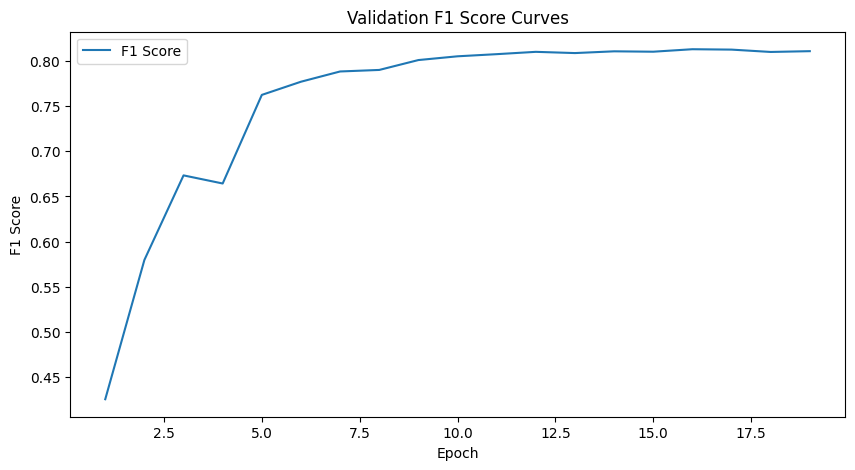

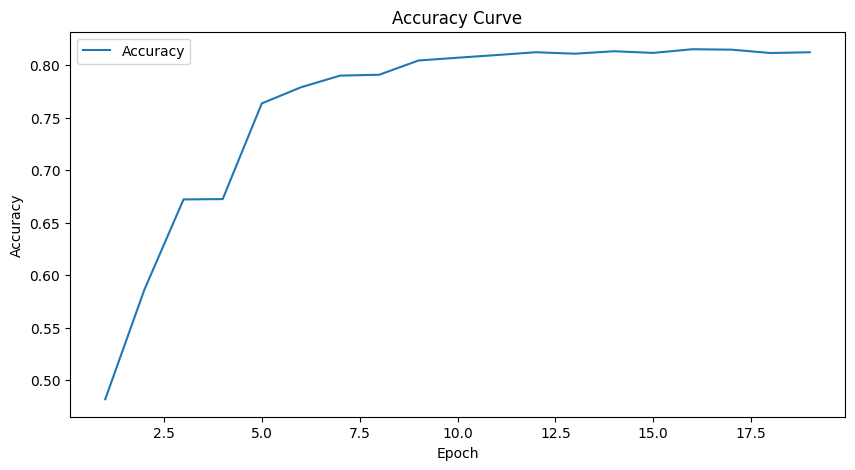

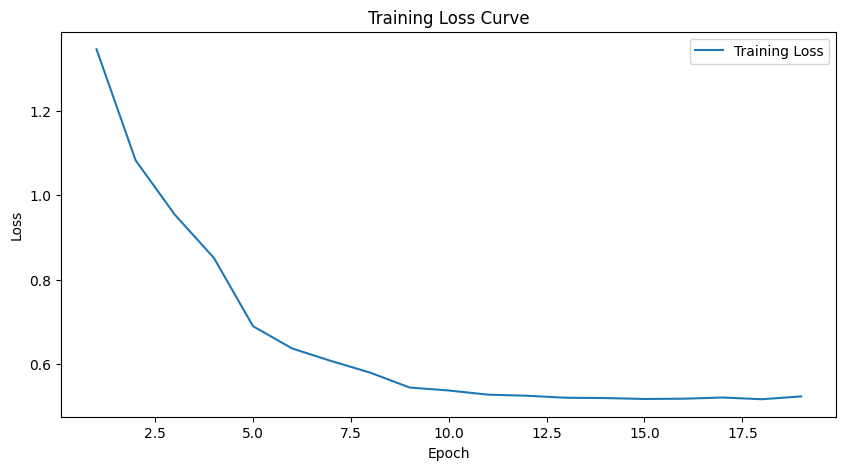

In [ ]:
analyze_training("e", "resnet50")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-7-c817c757975b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

Resume model from checkpoints/best_resnet50_e.pth
              precision    recall  f1-score   support

         MEL       0.62      0.23      0.34       171
          NV       0.85      0.83      0.84       909
         BCC       0.51      0.61      0.56        93
       AKIEC       0.26      0.56      0.36        43
         BKL       0.46      0.59      0.52       217
          DF       0.45      0.39      0.41        44
        VASC       0.68      0.74      0.71        35

    accuracy                           0.69      1512
   macro avg       0.55      0.57      0.53      1512
weighted avg       0.72      0.69      0.69      1512



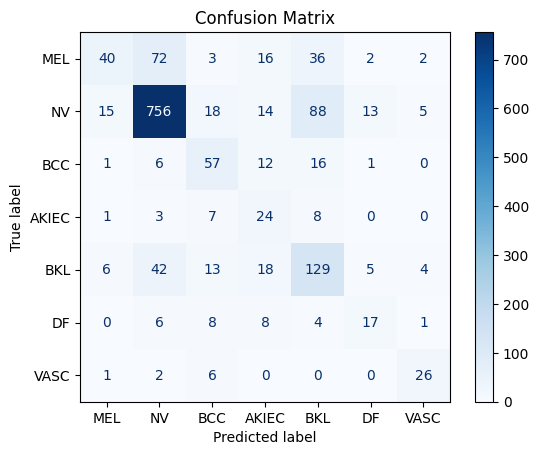

In [ ]:
predict_and_evaluate("e", test_image_file, test_label_file, "resnet50", True)

In [ ]:
# use SGD optimizer
resnet50_train("o", 32, 7, 0.0001, 32, 0.9, "SGD", True)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[!] Not restoring, training from scratch
Epoch 1, Itrs 1174/37568, Loss=1.064641


100%|██████████| 294/294 [00:06<00:00, 47.66it/s]


Epoch 2, Itrs 2348/37568, Loss=0.427830


100%|██████████| 294/294 [00:06<00:00, 47.21it/s]


Epoch 3, Itrs 3522/37568, Loss=0.240244


100%|██████████| 294/294 [00:06<00:00, 47.27it/s]


Epoch 4, Itrs 4696/37568, Loss=0.150256


100%|██████████| 294/294 [00:06<00:00, 46.79it/s]


Epoch 5, Itrs 5870/37568, Loss=0.095538


100%|██████████| 294/294 [00:06<00:00, 46.80it/s]


Epoch 6, Itrs 7044/37568, Loss=0.064132


100%|██████████| 294/294 [00:06<00:00, 47.15it/s]


Epoch 7, Itrs 8218/37568, Loss=0.044554


100%|██████████| 294/294 [00:06<00:00, 47.23it/s]


Epoch 8, Itrs 9392/37568, Loss=0.033453


100%|██████████| 294/294 [00:06<00:00, 46.97it/s]


Epoch 9, Itrs 10566/37568, Loss=0.024029


100%|██████████| 294/294 [00:06<00:00, 47.03it/s]


Epoch 10, Itrs 11740/37568, Loss=0.017651


100%|██████████| 294/294 [00:06<00:00, 47.15it/s]


Epoch 11, Itrs 12914/37568, Loss=0.014452


100%|██████████| 294/294 [00:06<00:00, 47.49it/s]


Epoch 12, Itrs 14088/37568, Loss=0.011891


100%|██████████| 294/294 [00:06<00:00, 47.39it/s]


Epoch 13, Itrs 15262/37568, Loss=0.010458


100%|██████████| 294/294 [00:06<00:00, 47.02it/s]


Early Stop 


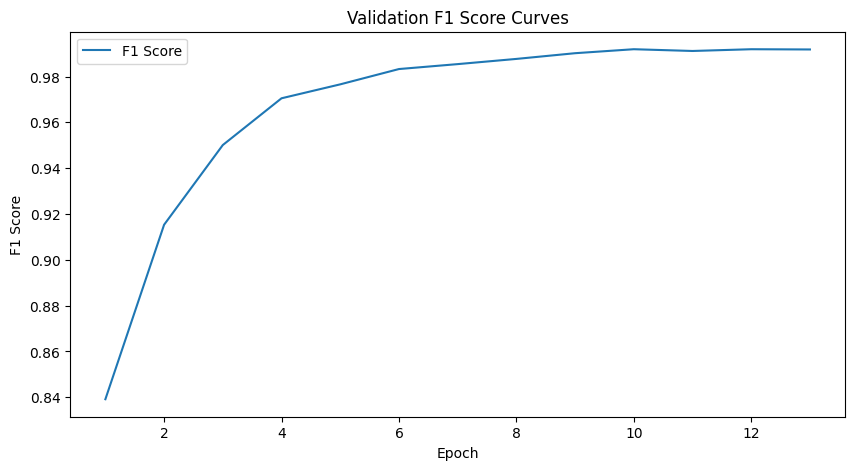

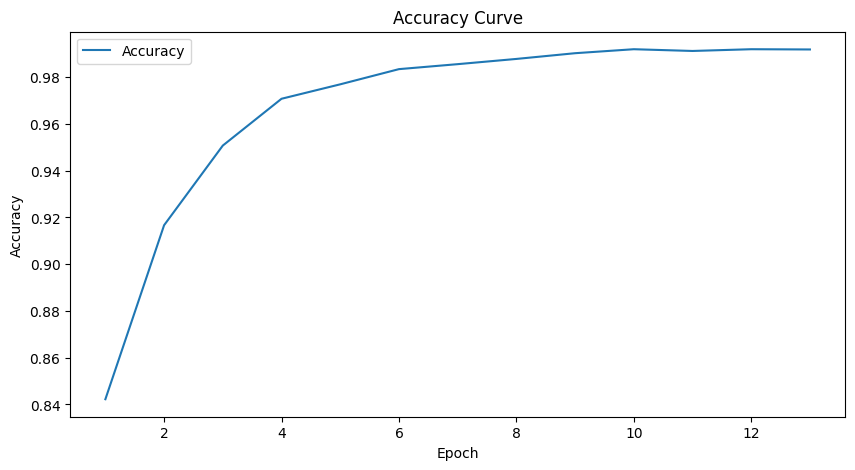

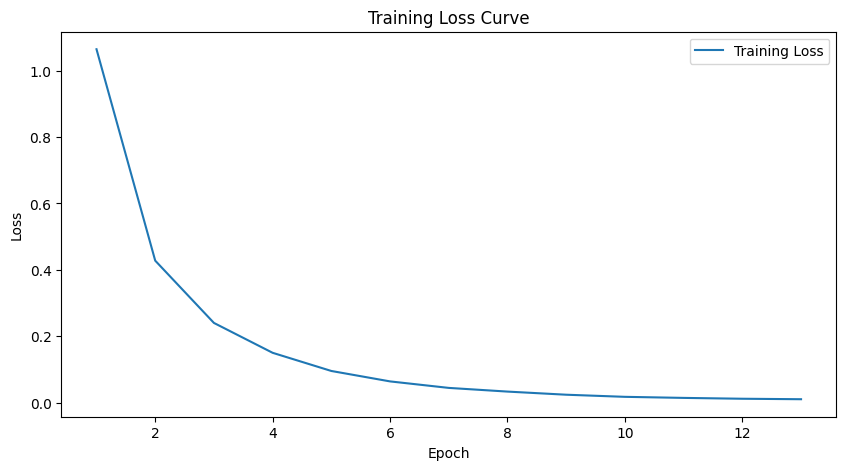

In [ ]:
analyze_training("o", "resnet50")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-7-c817c757975b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

Resume model from checkpoints/best_resnet50_o.pth
              precision    recall  f1-score   support

         MEL       0.62      0.55      0.58       171
          NV       0.85      0.93      0.89       909
         BCC       0.71      0.63      0.67        93
       AKIEC       0.54      0.74      0.63        43
         BKL       0.73      0.58      0.65       217
          DF       0.80      0.64      0.71        44
        VASC       0.82      0.40      0.54        35

    accuracy                           0.79      1512
   macro avg       0.73      0.64      0.67      1512
weighted avg       0.79      0.79      0.79      1512



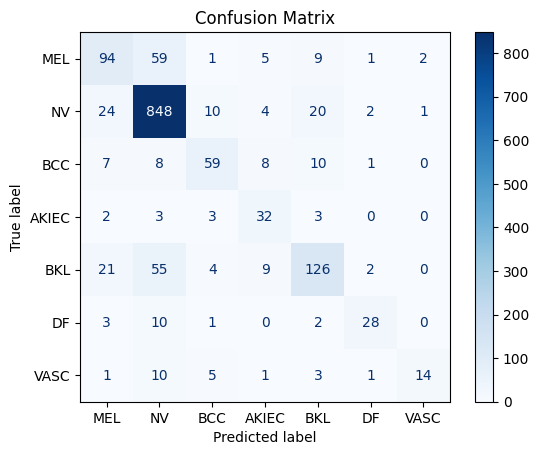

In [ ]:
predict_and_evaluate("o", test_image_file, test_label_file, "resnet50", True)

In [ ]:
#
resnet50_train("e", 32, 7, 0.0001, 32, 0.9, "SGD", True)

Device: cuda
Training set: 37568, Validation set: 9408


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[!] Not restoring, training from scratch
Epoch 1, Itrs 1174/37568, Loss=1.073572


100%|██████████| 294/294 [00:06<00:00, 46.99it/s]


Epoch 2, Itrs 2348/37568, Loss=0.523318


100%|██████████| 294/294 [00:06<00:00, 46.67it/s]


Epoch 3, Itrs 3522/37568, Loss=0.371741


100%|██████████| 294/294 [00:06<00:00, 46.43it/s]


Epoch 4, Itrs 4696/37568, Loss=0.285444


100%|██████████| 294/294 [00:06<00:00, 46.97it/s]


Epoch 5, Itrs 5870/37568, Loss=0.224904


100%|██████████| 294/294 [00:06<00:00, 47.17it/s]


Epoch 6, Itrs 7044/37568, Loss=0.180055


100%|██████████| 294/294 [00:06<00:00, 47.12it/s]


Epoch 7, Itrs 8218/37568, Loss=0.141816


100%|██████████| 294/294 [00:06<00:00, 47.07it/s]


Epoch 8, Itrs 9392/37568, Loss=0.115250


100%|██████████| 294/294 [00:06<00:00, 46.71it/s]


Epoch 9, Itrs 10566/37568, Loss=0.094059


100%|██████████| 294/294 [00:06<00:00, 47.27it/s]


Epoch 10, Itrs 11740/37568, Loss=0.076105


100%|██████████| 294/294 [00:06<00:00, 47.08it/s]


Epoch 11, Itrs 12914/37568, Loss=0.059158


100%|██████████| 294/294 [00:06<00:00, 47.10it/s]


Epoch 12, Itrs 14088/37568, Loss=0.047021


100%|██████████| 294/294 [00:06<00:00, 47.01it/s]


Epoch 13, Itrs 15262/37568, Loss=0.040926


100%|██████████| 294/294 [00:06<00:00, 47.21it/s]


Epoch 14, Itrs 16436/37568, Loss=0.032441


100%|██████████| 294/294 [00:06<00:00, 47.50it/s]


Epoch 15, Itrs 17610/37568, Loss=0.028227


100%|██████████| 294/294 [00:06<00:00, 47.69it/s]


Epoch 16, Itrs 18784/37568, Loss=0.024767


100%|██████████| 294/294 [00:06<00:00, 47.34it/s]


Epoch 17, Itrs 19958/37568, Loss=0.021815


100%|██████████| 294/294 [00:06<00:00, 46.63it/s]


Epoch 18, Itrs 21132/37568, Loss=0.017769


100%|██████████| 294/294 [00:06<00:00, 46.45it/s]


Epoch 19, Itrs 22306/37568, Loss=0.017357


100%|██████████| 294/294 [00:06<00:00, 46.92it/s]


Epoch 20, Itrs 23480/37568, Loss=0.014420


100%|██████████| 294/294 [00:06<00:00, 46.45it/s]


Epoch 21, Itrs 24654/37568, Loss=0.013154


100%|██████████| 294/294 [00:06<00:00, 47.05it/s]


Epoch 22, Itrs 25828/37568, Loss=0.011838


100%|██████████| 294/294 [00:06<00:00, 46.93it/s]


Epoch 23, Itrs 27002/37568, Loss=0.011446


100%|██████████| 294/294 [00:06<00:00, 47.12it/s]


Epoch 24, Itrs 28176/37568, Loss=0.009383


100%|██████████| 294/294 [00:06<00:00, 47.30it/s]


Epoch 25, Itrs 29350/37568, Loss=0.009519


100%|██████████| 294/294 [00:06<00:00, 47.38it/s]


Epoch 26, Itrs 30524/37568, Loss=0.009257


100%|██████████| 294/294 [00:06<00:00, 47.54it/s]


Early Stop 


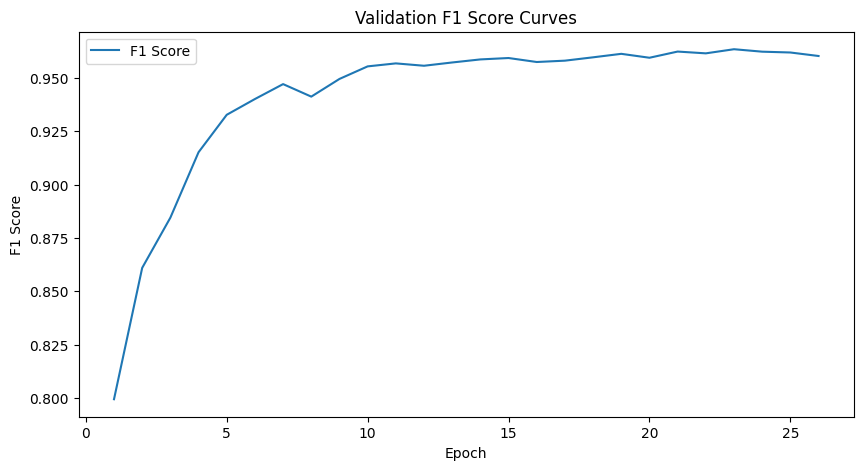

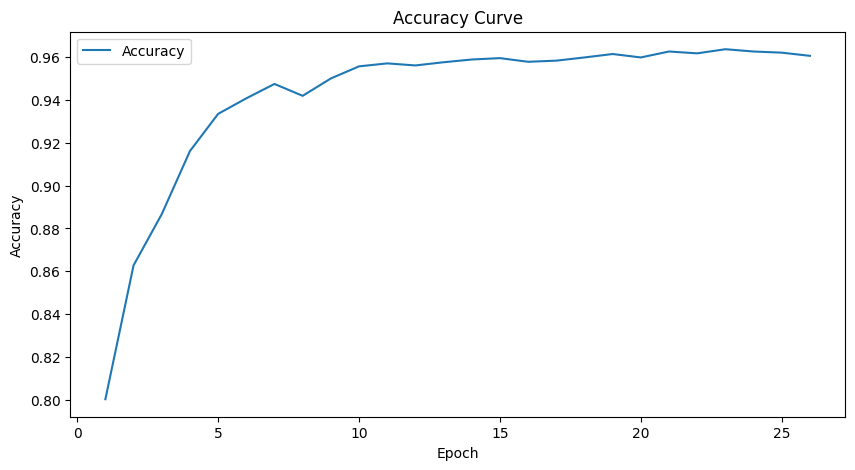

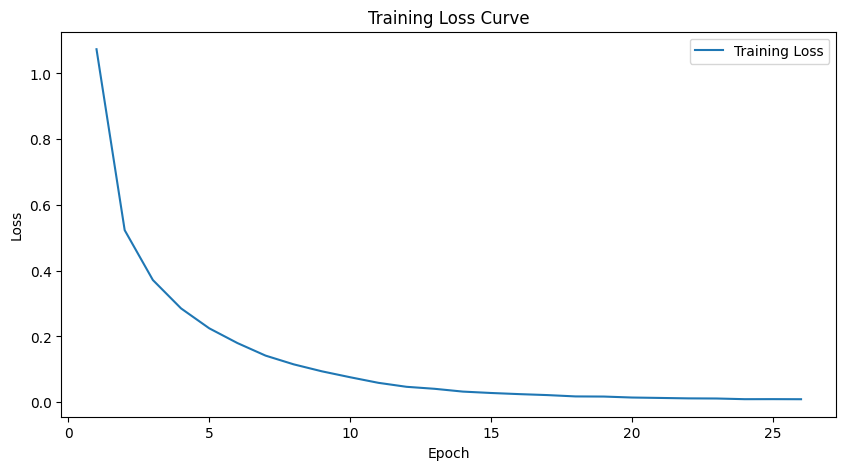

In [ ]:
analyze_training("e", "resnet50")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-7-c817c757975b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

Resume model from checkpoints/best_resnet50_e.pth
              precision    recall  f1-score   support

         MEL       0.69      0.58      0.63       171
          NV       0.89      0.92      0.90       909
         BCC       0.76      0.80      0.77        93
       AKIEC       0.49      0.63      0.55        43
         BKL       0.75      0.73      0.74       217
          DF       0.88      0.82      0.85        44
        VASC       0.89      0.71      0.79        35

    accuracy                           0.83      1512
   macro avg       0.76      0.74      0.75      1512
weighted avg       0.83      0.83      0.83      1512



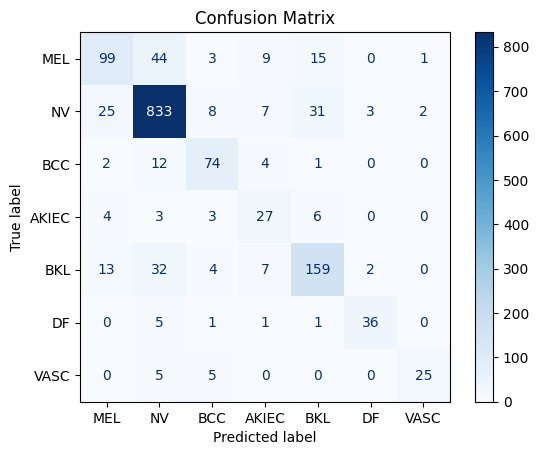

In [ ]:
predict_and_evaluate("e", test_image_file, test_label_file, "resnet50", True)

## Result

We first train the three models Alexnet, GoogleNet and Resnet50 with and without pre-training, both based on the original dataset and the Adam optimizer. Although the training scores are high, the post-test results are not very good, for example, the f1 score is only 40% for Alexnet and GoogleNet, and 45% for Resnet50. The prediction accuracy for the labels DF, MEL, and AKIEC is very low, and most of the labels NV are misclassified as MEL.

Later, it was found that the above problems were caused by overfitting and label imbalance, which made the model learn the features of skin lesions poorly. Another problem is that the Adam optimizer combined with the StepLR learning rate reduction strategy makes the model converge too fast, perhaps ignoring important features of each label. We focused all our optimizations on the initial best performing model, Resnet50.

The first was data augmentation, which was able to reduce the problem of the majority of labels NV being misclassified as MEL, increasing the average f1 score from 45% to 53%. But labels DF, MEL, and AKIEC all predict f1 scores around 35%. We then replaced the Adam optimizer with an SGD optimizer using a momentum of 0.9 to refine learning. With the SGD optimizer, the number of epochs increased significantly, but the prediction results improved substantially. The average f1 score increases directly to 75%, and the f1 score of the label DF increases from the initial 27% to 85%.

### Alexnet

#### non-pretrain
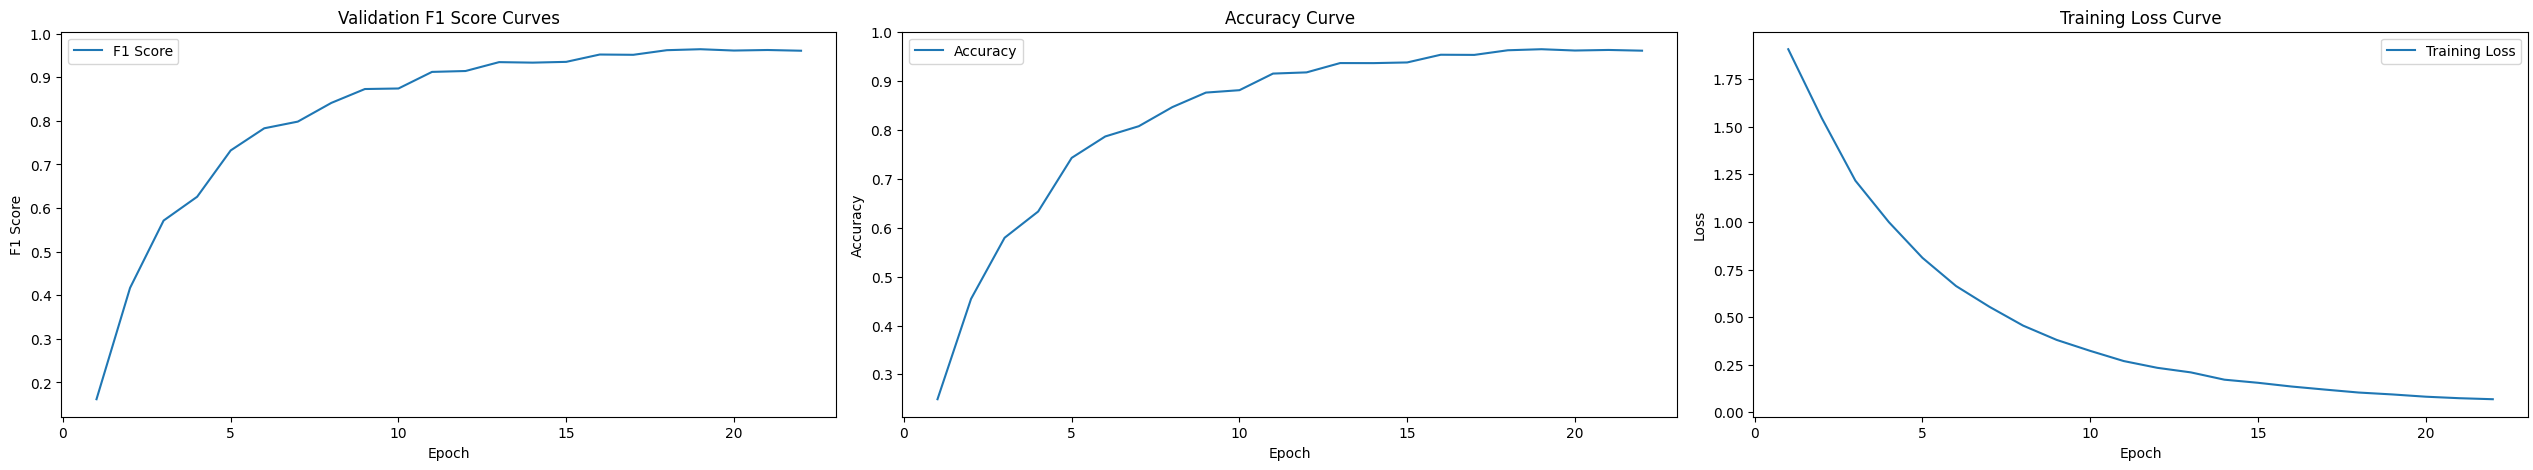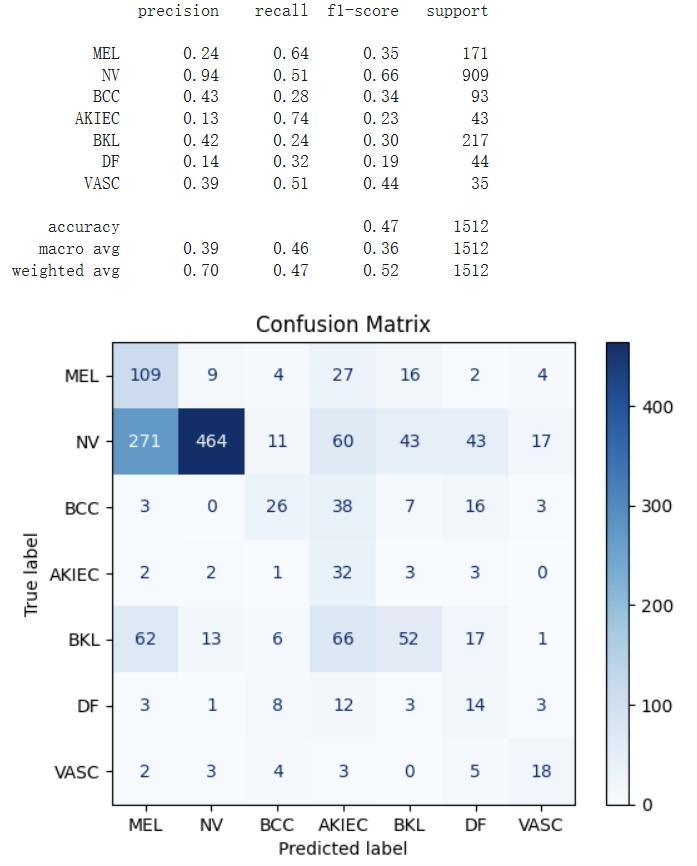

#### pretrain
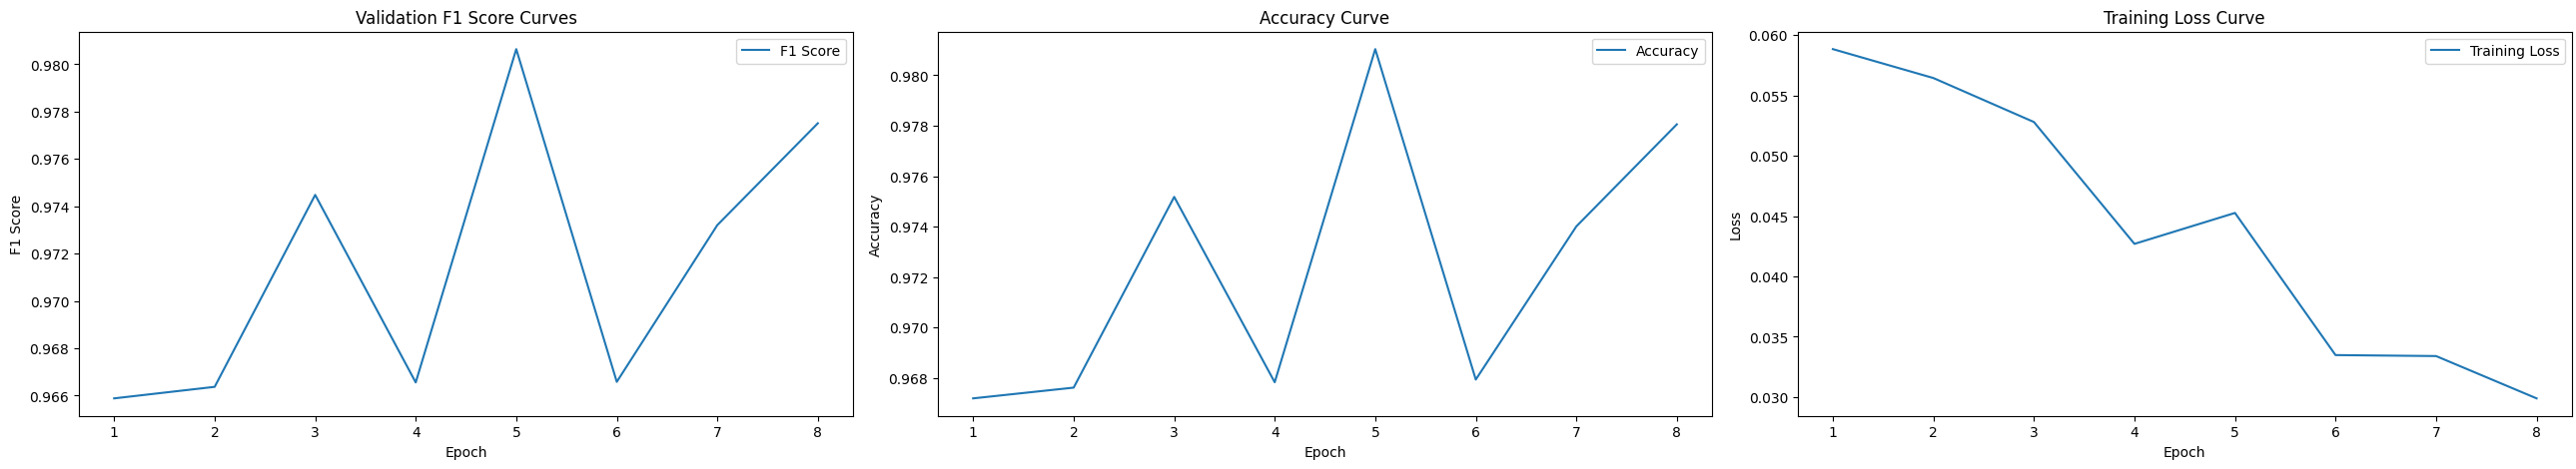
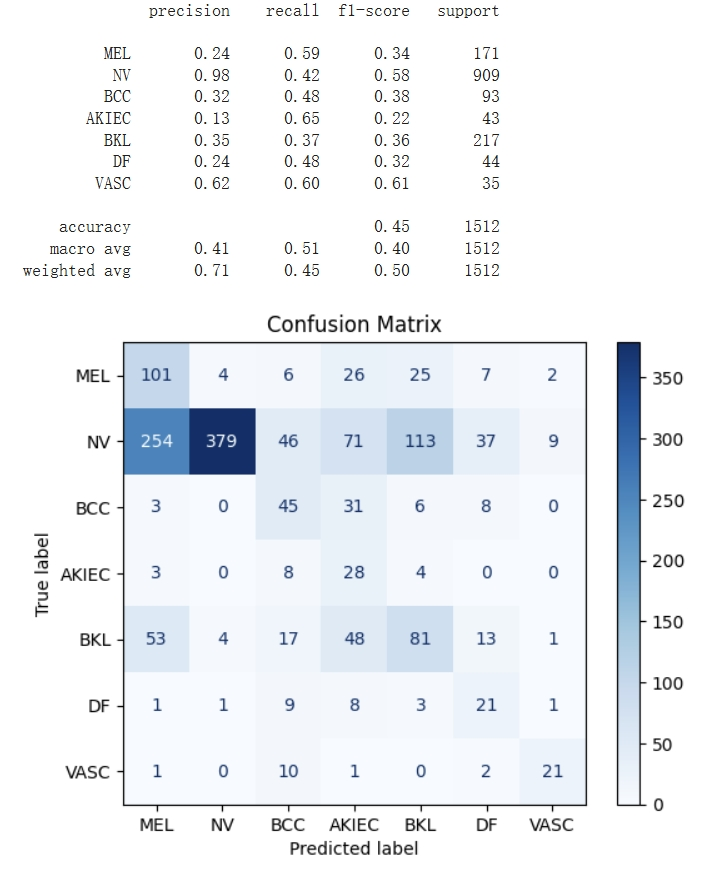

### GoogleNet

#### non-pretrain

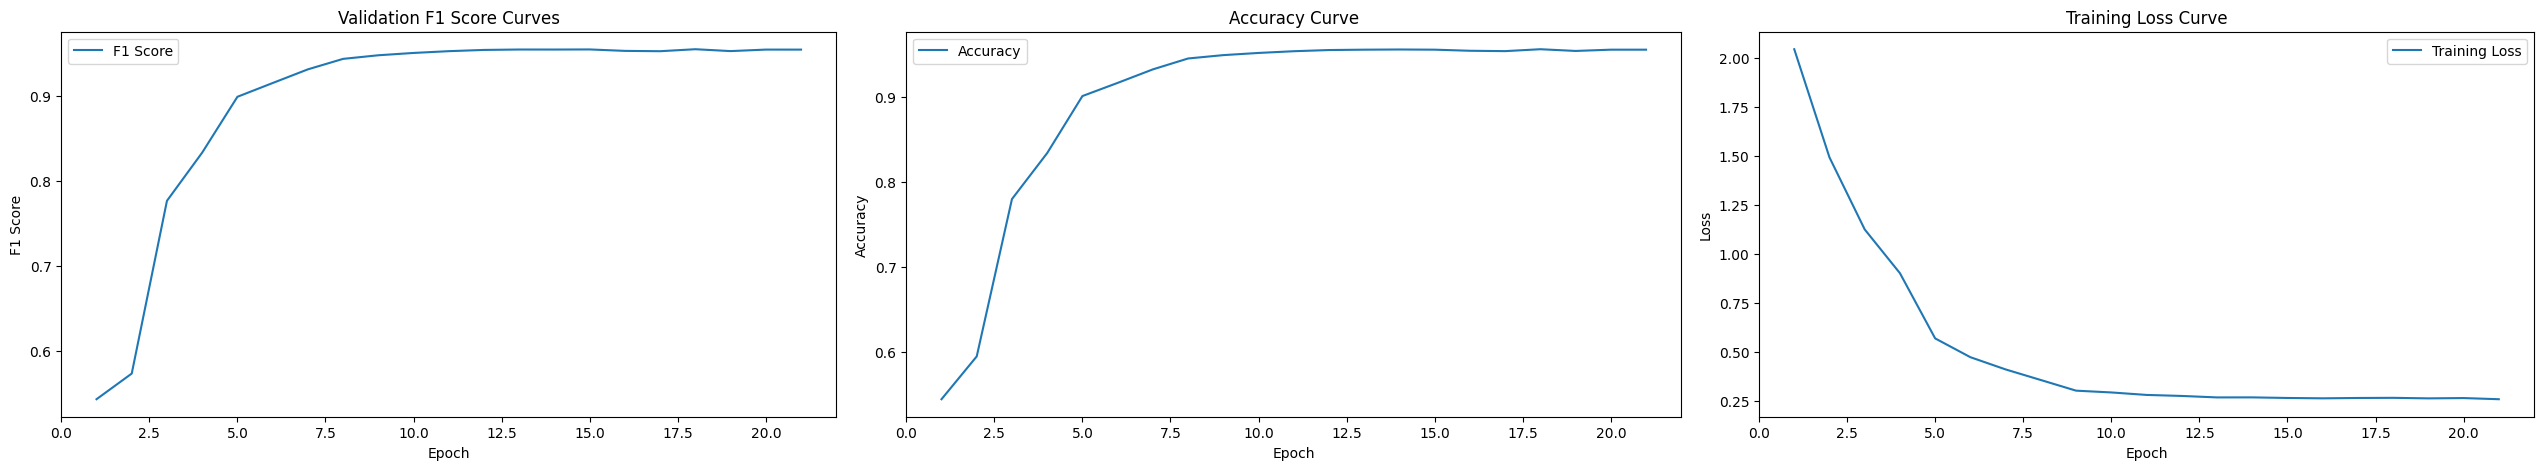
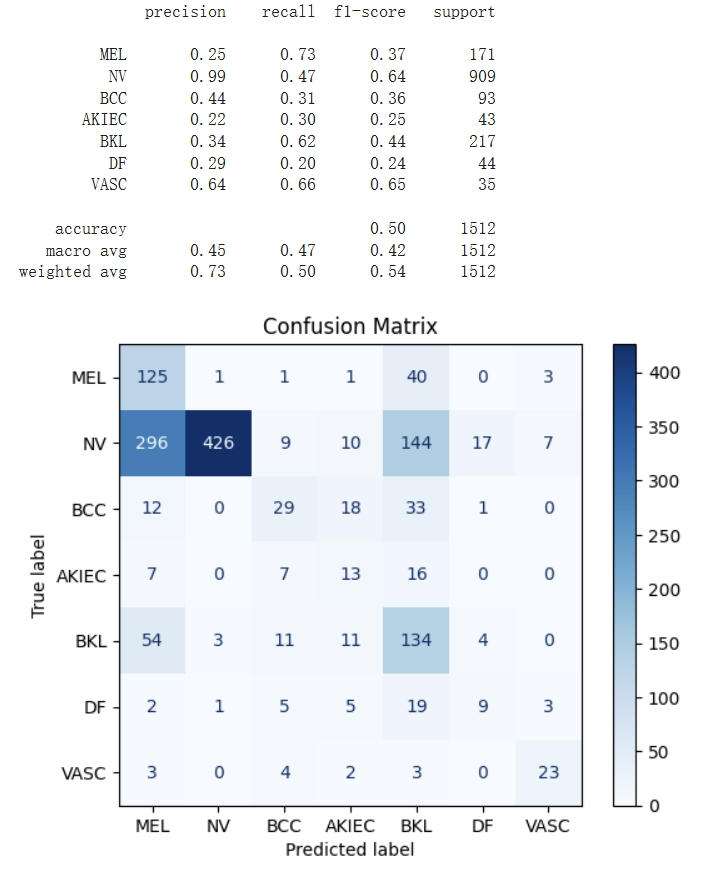



#### pretrain

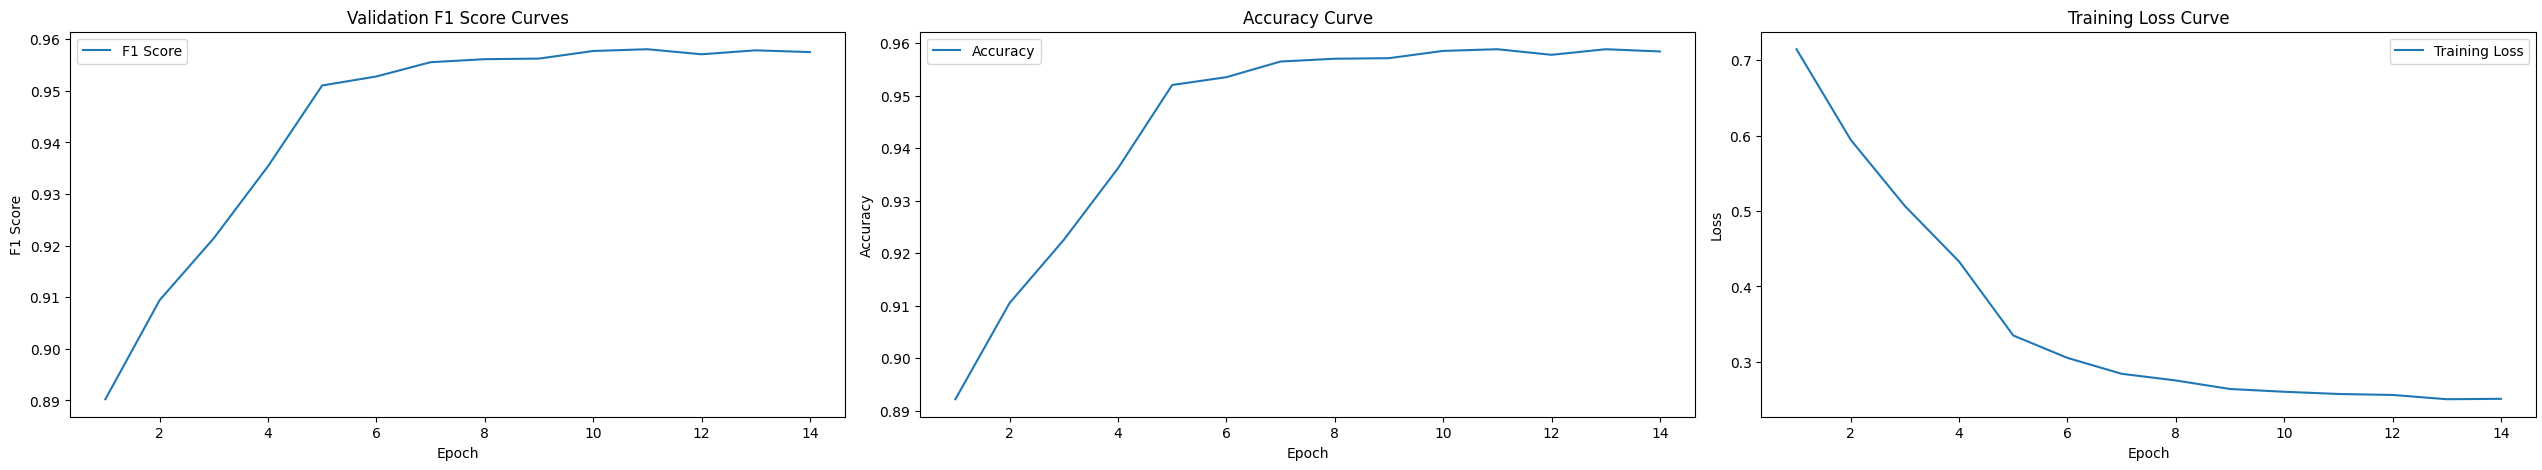
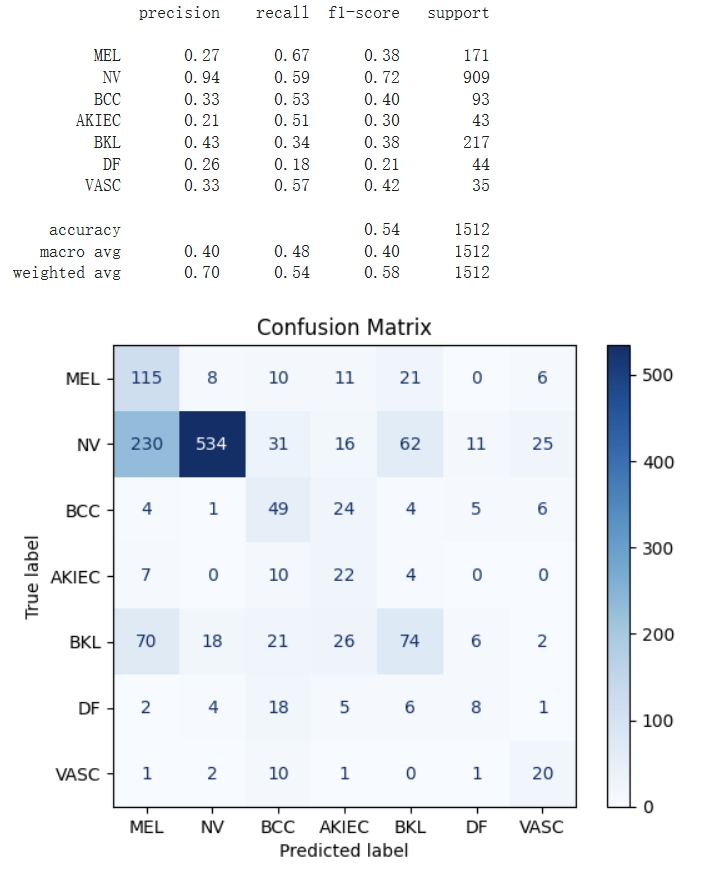


### Resnet50

#### non-pretrain
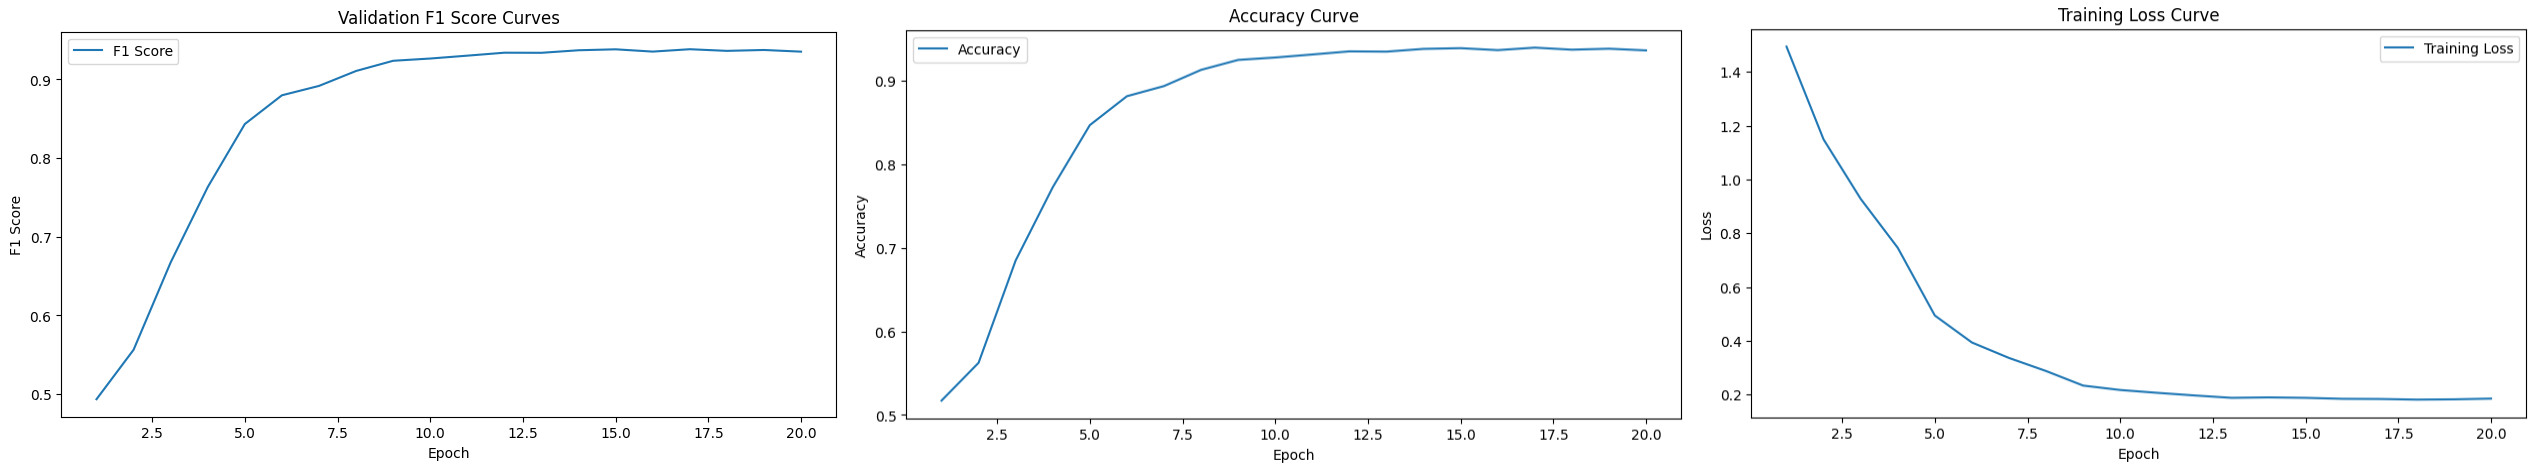

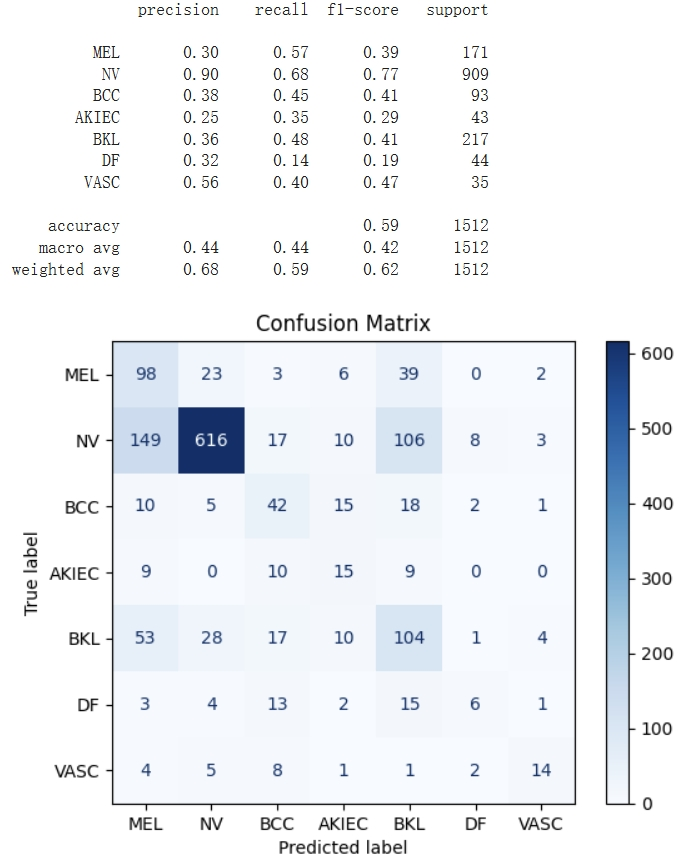

#### pretrain
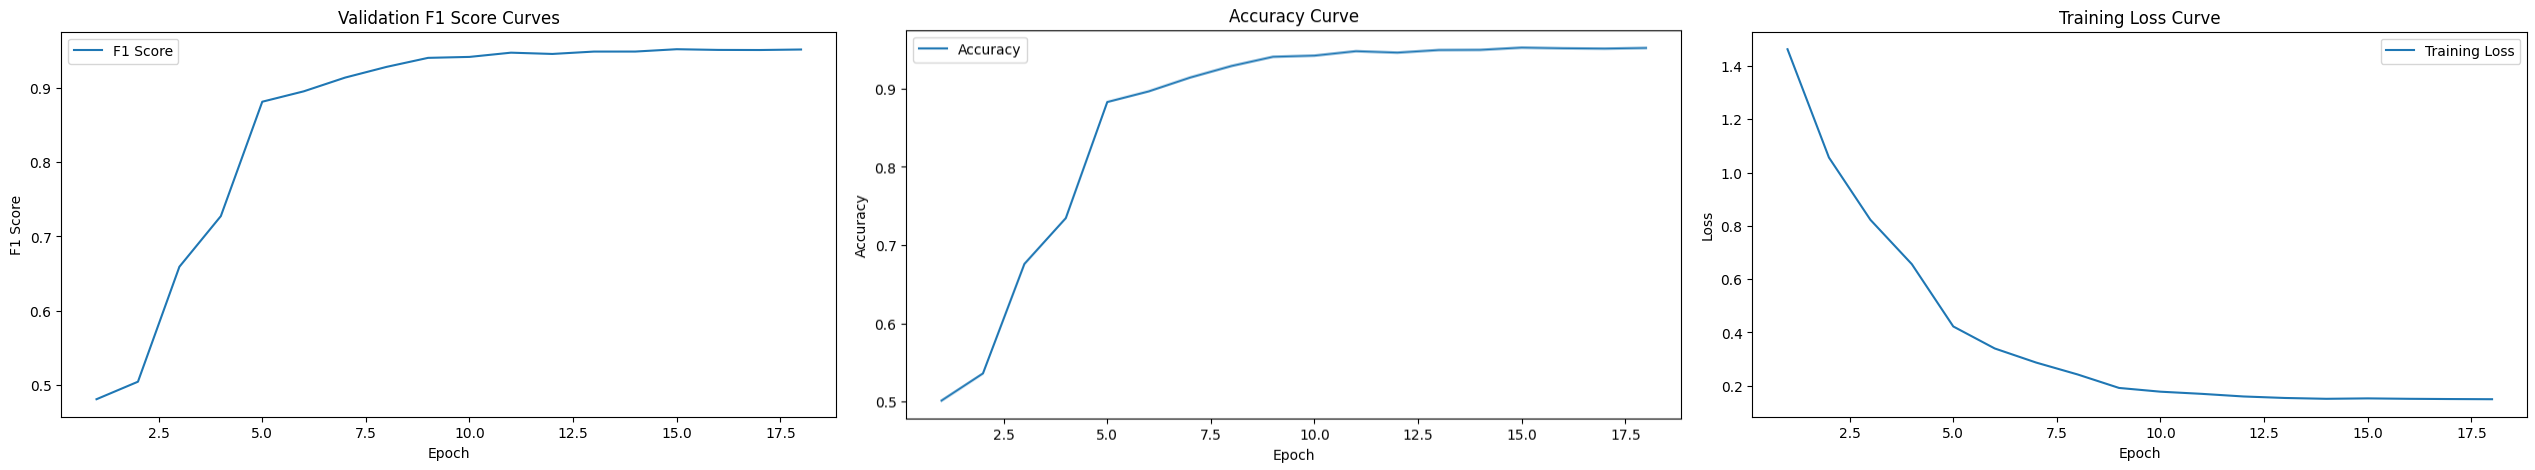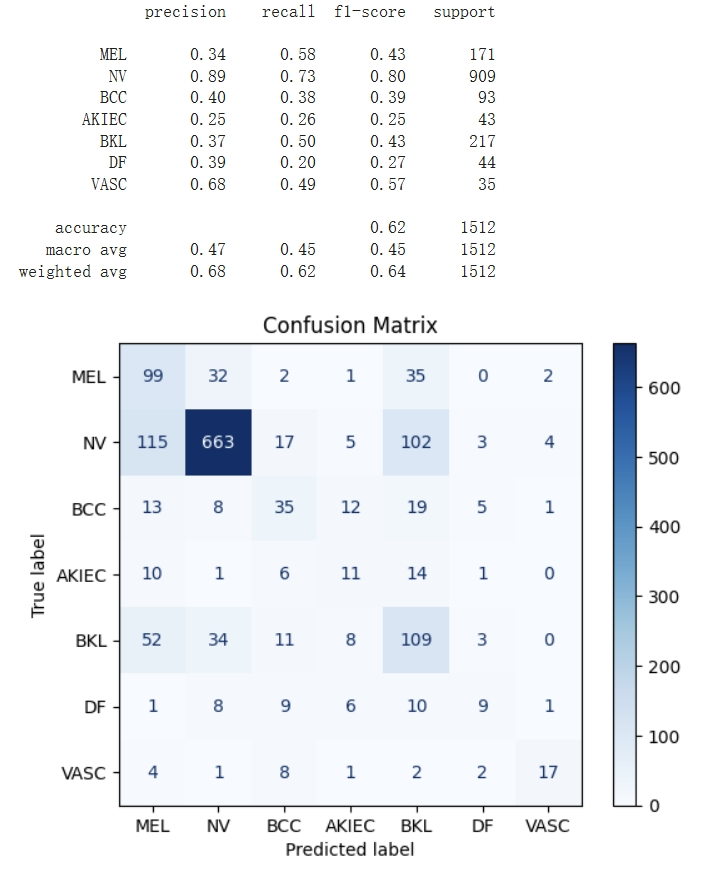

#### using augmented dataset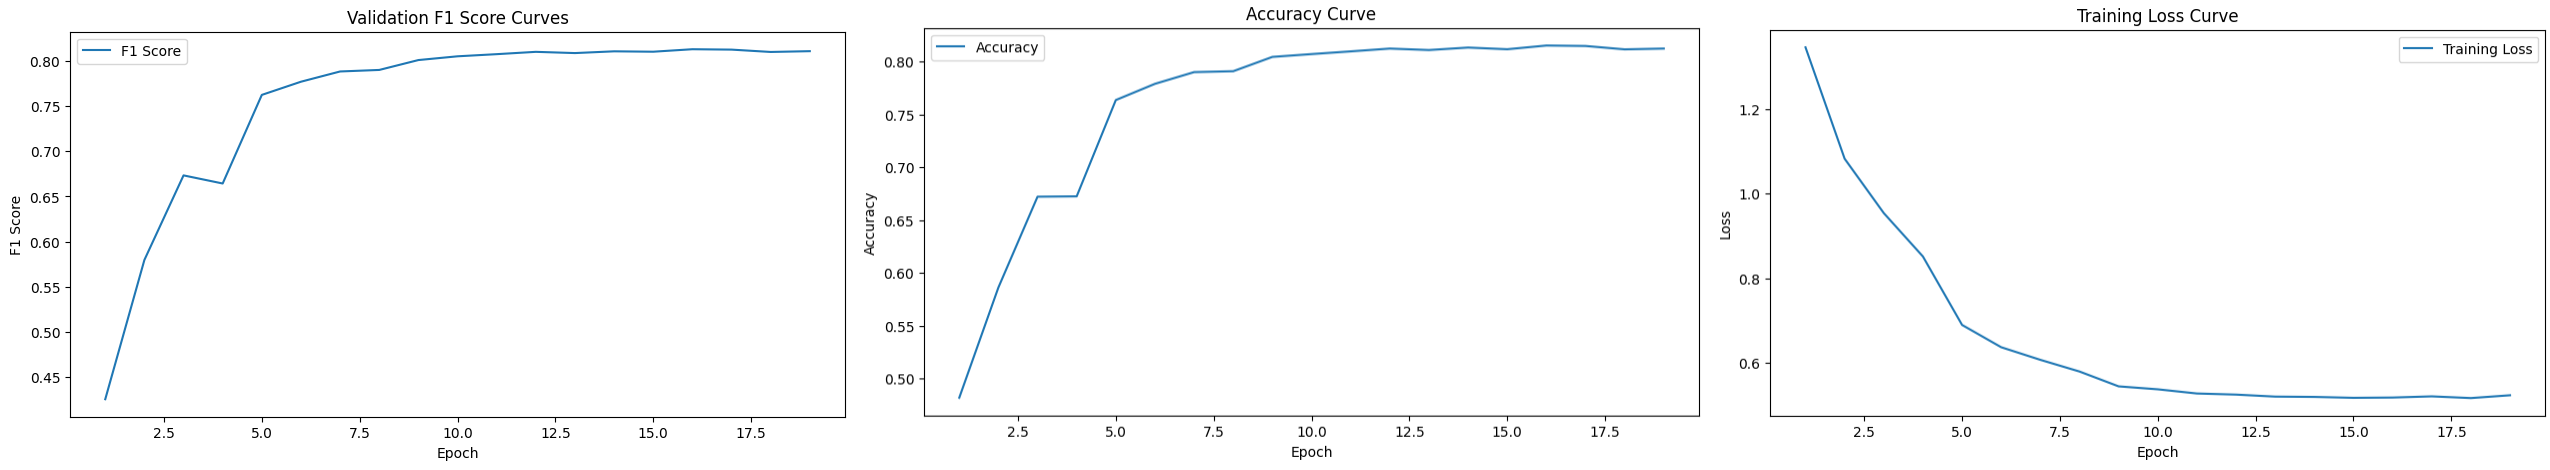
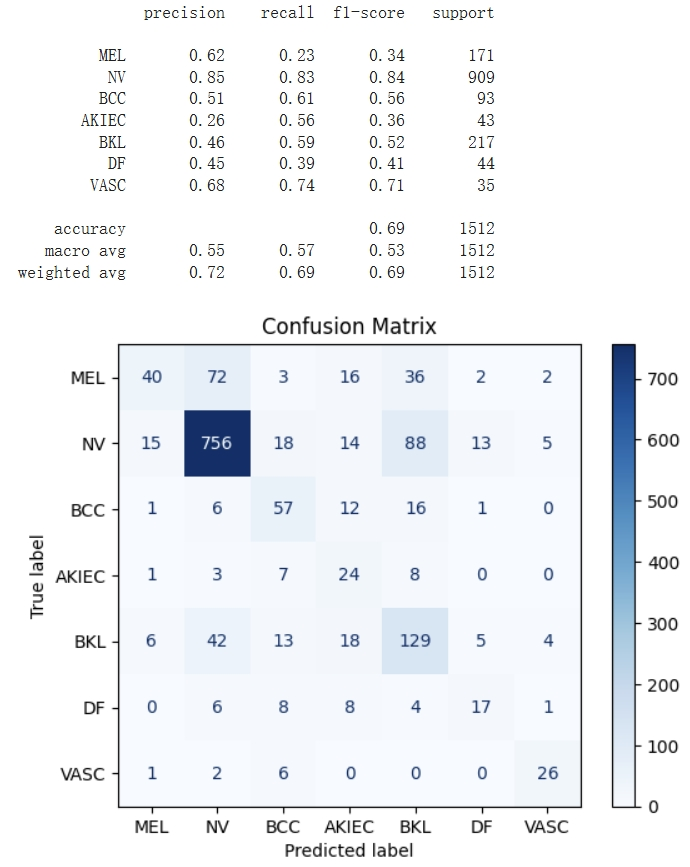

#### using SGD optimizer
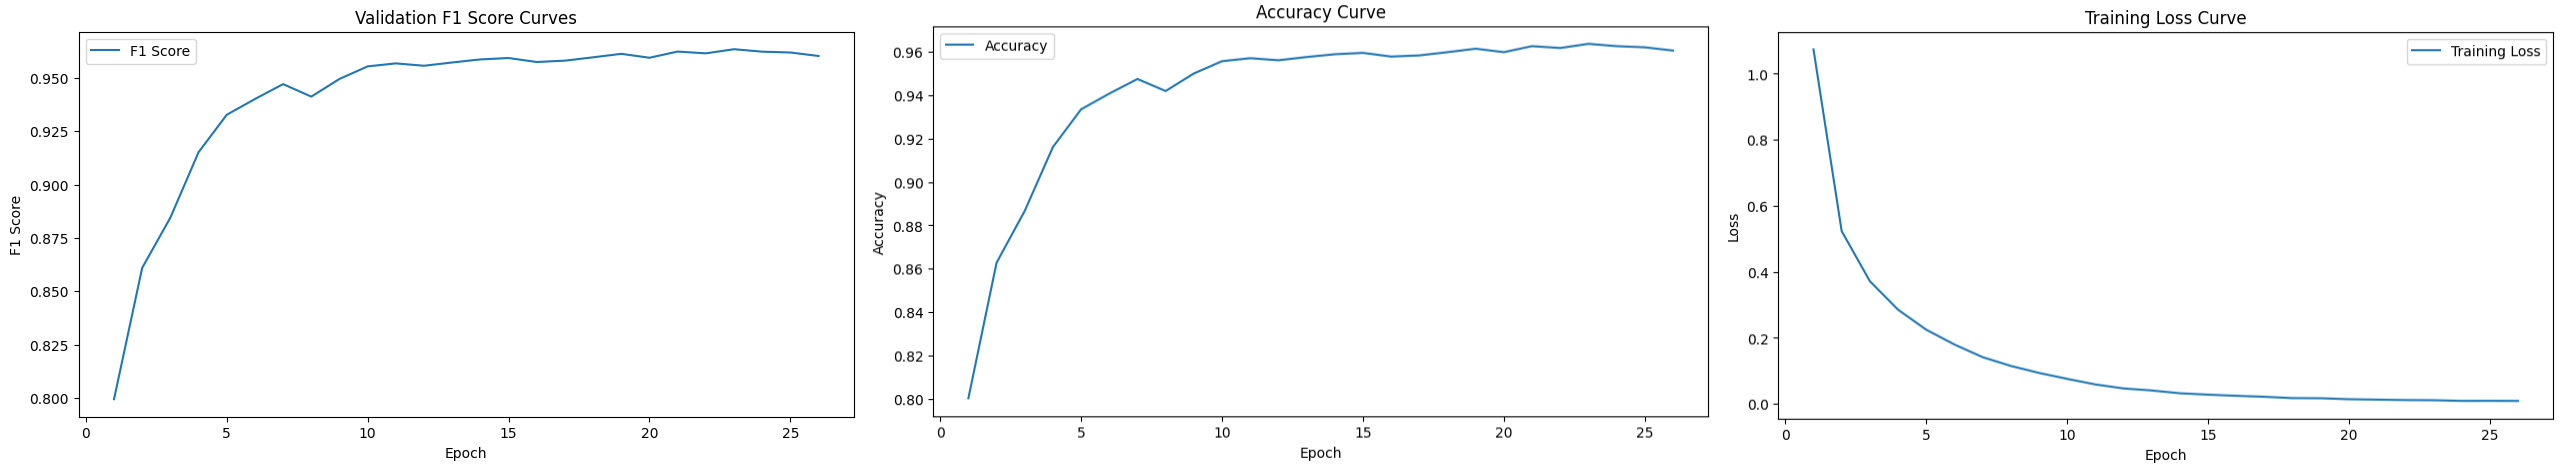
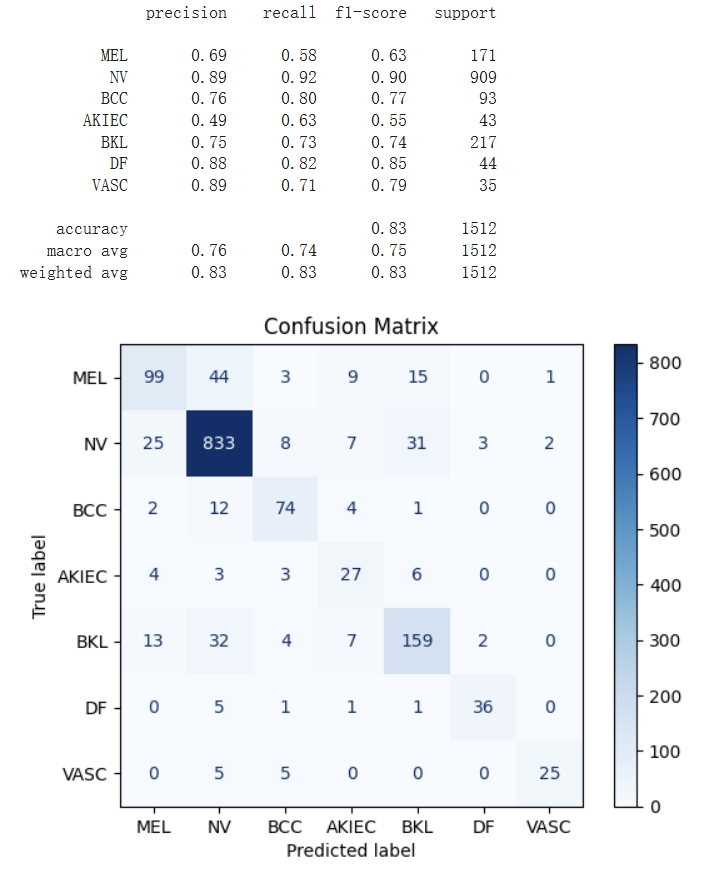

## Discussion

### 1.   Results Analysis
* The three deep learning models—AlexNet, GoogLeNet, and ResNet50—demonstrated different Pros & Cons in the skin lesion classification task to extract complex features. Resnet50 achieved the best performance in those models.
* Effectiveness of Pretraining: Pretraining enables the model to start with a high-level understanding, which is particularly advantageous for skin lesion classification where certain textures and colour patterns are associated with specific diagnoses.
* Data Augmentation and Resampling: Given the class imbalance in the ISIC dataset, data augmentation and resampling helped the model generalize across lesion types. Augmentation techniques like rotation, flipping, and colour adjustments simulate real-world variability.
* Optimization Strategy: SGD (with momentum) provides a more stable update path, especially when learning complex features. Each update in SGD primarily depends on the current batch and the accumulated momentum direction, making the updates more robust. For complex image data, this update method better adapts to the extraction of intricate features, helping to avoid oscillations that can arise from rapid convergence. Even with the StepLR strategy, the Adam optimizer still failed to achieve better performance than SGD.



### 2.   Pros & Cons
Pros:

* AlexNet: Lower computational cost and faster training make it suitable for applications needing basic feature extraction.
* GoogLeNet: The Inception modules enable multi-scale feature extraction, making it particularly effective on complex datasets with relatively low parameter counts.
* ResNet50: Residual connections address gradient vanishing and degradation in deeper networks, enhancing training stability and feature extraction, which is valuable for complex tasks.

Cons:

* AlexNet: Limited feature extraction due to its shallow architecture.
* GoogLeNet: More complex structure with increased computational demands due to Inception modules.
* ResNet50: High computational and memory demands due to its deep architecture and large parameter count.
### 3.   Limitations
* Dataset Bias: The high accuracy may still reflect dataset bias, limiting the model’s generalization ability.
* Overfitting Risk: The high accuracy could also indicate overfitting. In particular, ResNet50’s high parameter count and GoogLeNet's complex structure may increase this risk.
Computational Cost: ResNet50’s extensive resources and GoogLeNet’s complex design can be barriers in practical applications, requiring high computational power.


### 4.   Future Work
* Data Augmentation and Diversity: Increase the diversity and representativeness of the training data to enhance generalization. Utilize more complex techniques like CutMix and MixUp to increase the diversity of training data.
* Hybrid Model Development: Explore combining strengths of current architectures (such as the efficiency of Inception modules and robustness of residual connections) with newer model designs like EfficientNet or Vision Transformers to improve performance.

## Conclusion

Pretrained models combined with data augmentation and SGD optimization provided a approach for skin lesion classification. The ability of pretrained models to transfer learned general features, coupled with the stability of SGD and the variety introduced by data augmentation, led to high performance and generalization.